In [ ]:
!git clone https://github.com/apple/ml-stuttering-events-dataset.git
%cd ml-stuttering-events-dataset

Cloning into 'ml-stuttering-events-dataset'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 29 (delta 8), reused 8 (delta 8), pack-reused 12 (from 1)
Receiving objects: 100% (29/29), 465.21 KiB | 4.31 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/ml-stuttering-events-dataset


In [ ]:
!pip install pandas numpy librosa soundfile tqdm requests pydub

In [ ]:
!pip install scipy

In [ ]:
!ls -la

total 2556
drwxr-xr-x 3 root root    4096 Apr 20 16:36 .
drwxr-xr-x 1 root root    4096 Apr 20 16:36 ..
-rw-r--r-- 1 root root    3357 Apr 20 16:36 CODE_OF_CONDUCT.md
-rw-r--r-- 1 root root     747 Apr 20 16:36 CONTRIBUTING.md
-rw-r--r-- 1 root root    2054 Apr 20 16:36 download_audio.py
-rw-r--r-- 1 root root    2246 Apr 20 16:36 extract_clips.py
-rw-r--r-- 1 root root    3414 Apr 20 16:36 fluencybank_episodes.csv
-rw-r--r-- 1 root root  311595 Apr 20 16:36 fluencybank_labels.csv
drwxr-xr-x 8 root root    4096 Apr 20 16:36 .git
-rw-r--r-- 1 root root    2317 Apr 20 16:36 LICENSE.md
-rw-r--r-- 1 root root    3829 Apr 20 16:36 README.md
-rw-r--r-- 1 root root      24 Apr 20 16:36 requirements.txt
-rw-r--r-- 1 root root   65360 Apr 20 16:36 SEP-28k_episodes.csv
-rw-r--r-- 1 root root 2187391 Apr 20 16:36 SEP-28k_labels.csv


In [ ]:
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
import warnings
from tqdm import tqdm
import random
import scipy
import scipy.io.wavfile as wavfile
from matplotlib.patches import Rectangle

import IPython.display as ipd
import soundfile as sf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Create necessary directories
os.makedirs('./raw_audio', exist_ok=True)
os.makedirs('./clips', exist_ok=True)
os.makedirs('./features', exist_ok=True)
os.makedirs('./plots', exist_ok=True)


whole code from previous notebook

Loading dataset files...
Loaded 385 episodes and 28177 labeled clips

Episodes DataFrame (first 3 rows):
                                                Show  \
0  He_Stutters_Podcast_–_Make_Room_For_The_Stutte...   
1  He_Stutters_Podcast_–_Make_Room_For_The_Stutte...   
2  He_Stutters_Podcast_–_Make_Room_For_The_Stutte...   

                        EpId  \
0  episode-208-with-kelsey-h   
1  episode-208-with-kelsey-h   
2  episode-208-with-kelsey-h   

                                                 URL      Source  SourceId  
0  https://stutterrockstar.files.wordpress.com/20...  HeStutters         0  
1  https://stutterrockstar.files.wordpress.com/20...  HeStutters         1  
2  https://stutterrockstar.files.wordpress.com/20...  HeStutters         2  

Labels DataFrame (first 3 rows):
         Show  EpId  ClipId     Start      Stop  Unsure  PoorAudioQuality  \
0  HeStutters     0       0  31900320  31948320       0                 0   
1  HeStutters     0       1  31977120  320251

Successfully downloaded ./raw_audio/He_Stutters_Podcast_–_Make_Room_For_The_Stuttering/episode-208-with-kelsey-h/0.mp3
Successfully downloaded ./raw_audio/He_Stutters_Podcast_–_Make_Room_For_The_Stuttering/episode-208-with-kelsey-h/1.mp3

Downloaded 2 audio files

Extracting clips for He_Stutters_Podcast_–_Make_Room_For_The_Stuttering, Episode episode-208-with-kelsey-h
Using mapping: He_Stutters_Podcast_–_Make_Room_For_The_Stuttering, episode-208-with-kelsey-h -> HeStutters, 23
Found 215 labeled clips


Extracting clips:   0%|          | 0/215 [00:00<?, ?it/s]


Extracting clips for He_Stutters_Podcast_–_Make_Room_For_The_Stuttering, Episode episode-208-with-kelsey-h
Using mapping: He_Stutters_Podcast_–_Make_Room_For_The_Stuttering, episode-208-with-kelsey-h -> HeStutters, 23
Found 215 labeled clips


Extracting clips:   0%|          | 0/215 [00:00<?, ?it/s]


Extracted 430 clips

Analyzing sample clip:
Clip ID: 0
Show: He_Stutters_Podcast_–_Make_Room_For_The_Stuttering, Episode: episode-208-with-kelsey-h
Stutter Label: No stuttering
Start Sample: 2007840
Stop Sample: 2055840
Duration: 3.00s


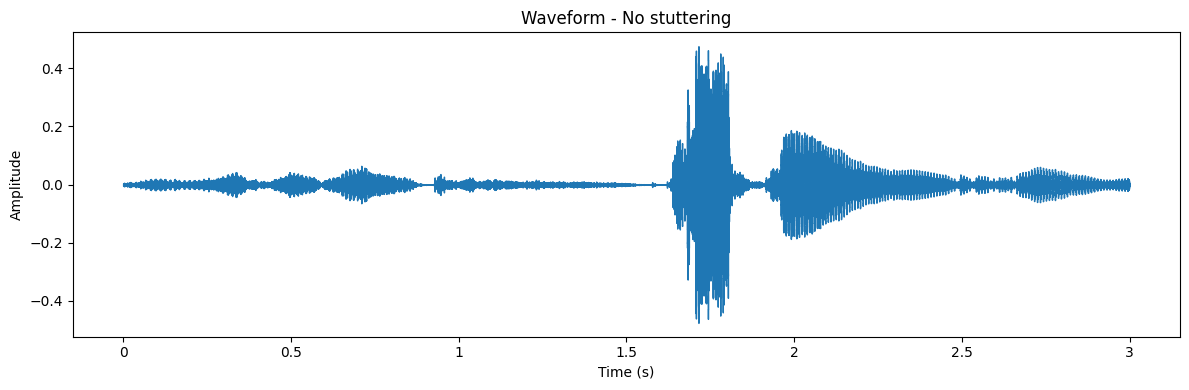

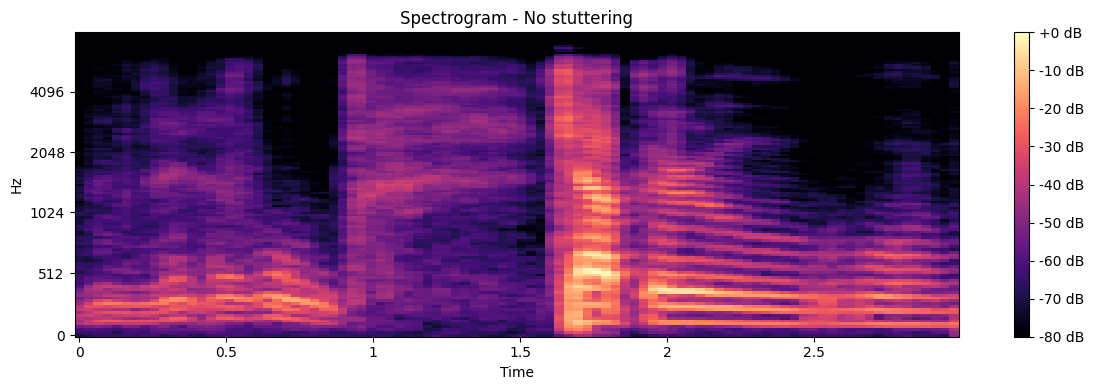


Extracting MFCC features...


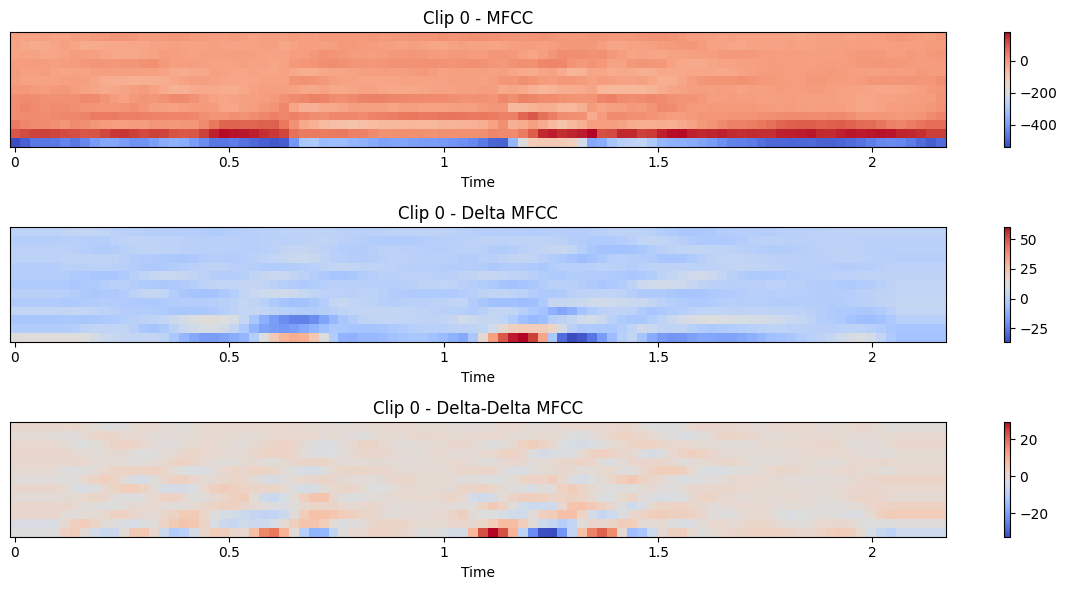


Extracting prosodic features...


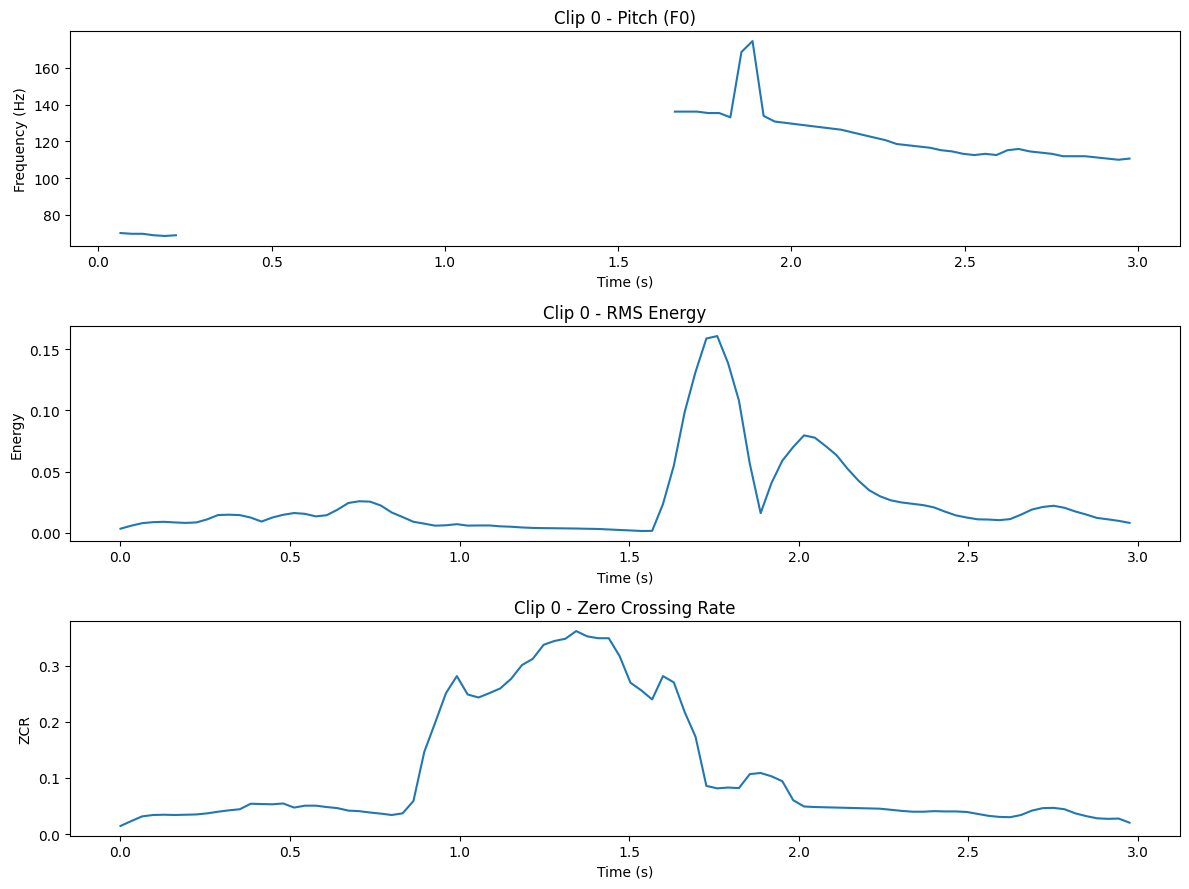


Found 376 stuttered clips and 54 non-stuttered clips

Comparing a stuttered and non-stuttered clip:

Stuttered clip:
Clip ID: 1
Show: He_Stutters_Podcast_–_Make_Room_For_The_Stuttering, Episode: episode-208-with-kelsey-h
Stutter Label: Block, Interjection
Start Sample: 39103520
Stop Sample: 39151520
Duration: 3.00s


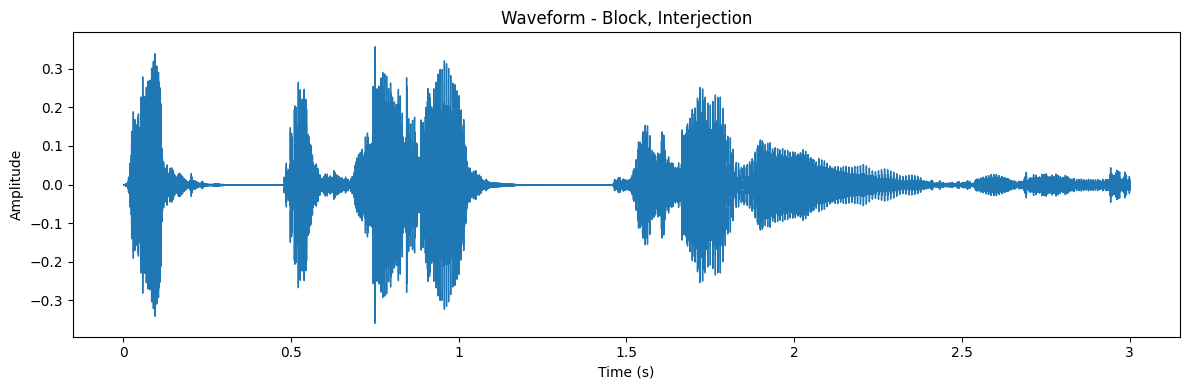

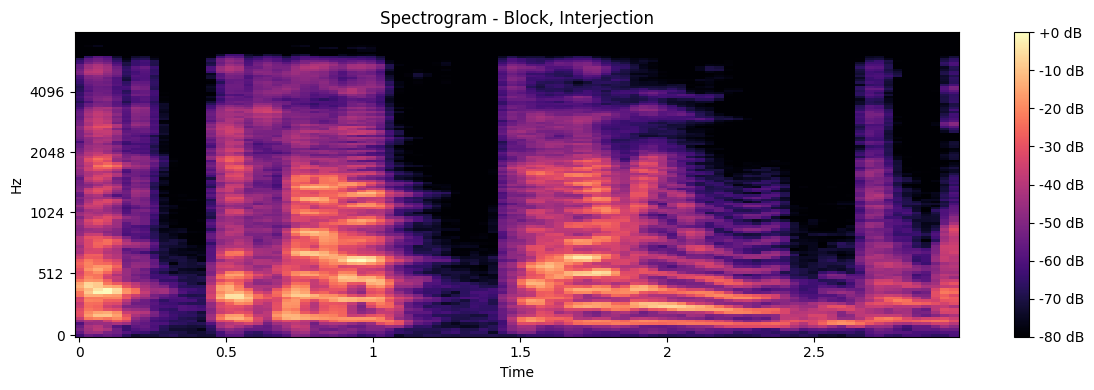


Non-stuttered clip:
Clip ID: 0
Show: He_Stutters_Podcast_–_Make_Room_For_The_Stuttering, Episode: episode-208-with-kelsey-h
Stutter Label: No stuttering
Start Sample: 2007840
Stop Sample: 2055840
Duration: 3.00s


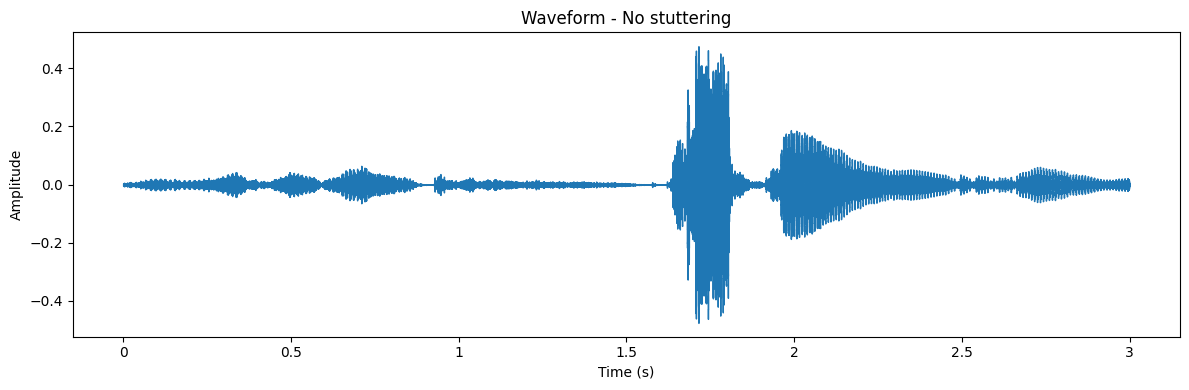

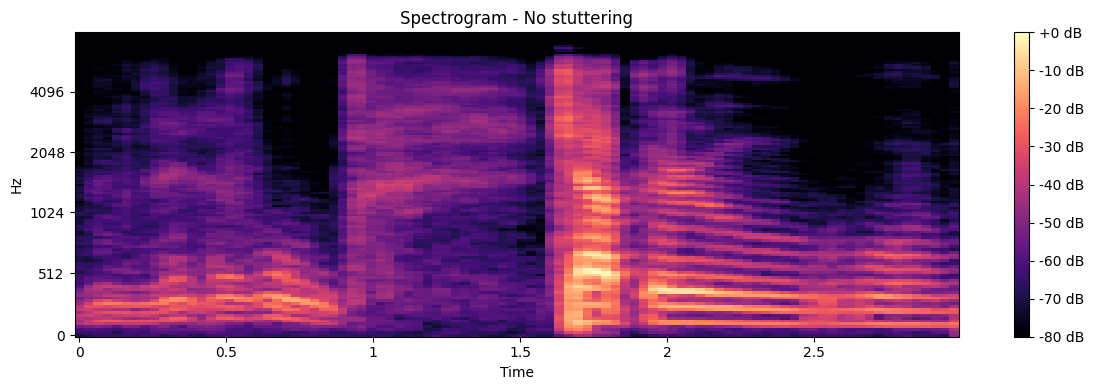

In [ ]:
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from tqdm.notebook import tqdm


# 1. Load and process the CSV files with proper formatting
print("Loading dataset files...")

# Fix episodes data parsing
episodes_df = pd.read_csv('SEP-28k_episodes.csv', header=None)
episodes_df.columns = ['Show', 'EpId', 'URL', 'Source', 'SourceId']

# Clean whitespace from string columns
for col in episodes_df.columns:
    if episodes_df[col].dtype == 'object':
        episodes_df[col] = episodes_df[col].str.strip()

# Load labels data
labels_df = pd.read_csv('SEP-28k_labels.csv')

print(f"Loaded {len(episodes_df)} episodes and {len(labels_df)} labeled clips")
print("\nEpisodes DataFrame (first 3 rows):")
print(episodes_df.head(3))
print("\nLabels DataFrame (first 3 rows):")
print(labels_df.head(3))

# 2. Create a mapping between episode files and label identifiers
def create_episode_mapping(episodes_df, labels_df):
    """Create mapping between episodes and their standardized identifiers in labels"""
    mapping = {}

    # Get all unique shows in labels
    label_shows = labels_df['Show'].unique()

    for _, row in episodes_df.iterrows():
        show_name = row['Show']
        ep_id = row['EpId']

        # Check if Source column matches any label show
        if 'Source' in row and row['Source'] in label_shows:
            mapping[(show_name, ep_id)] = (row['Source'], row['SourceId'])
        # Check if Show column directly matches any label show
        elif show_name in label_shows:
            mapping[(show_name, ep_id)] = (show_name, ep_id)
        # Otherwise, assume HeStutters is the standardized name
        else:
            mapping[(show_name, ep_id)] = ("HeStutters", ep_id)

    return mapping

episode_mapping = create_episode_mapping(episodes_df, labels_df)
print(f"\nCreated mapping for {len(episode_mapping)} episodes")

# 3. Function to download audio files without using the problematic script
def download_audio_files(episodes_df, n=2, output_dir='./raw_audio'):
    """Download audio files for a sample of episodes directly in Python"""
    os.makedirs(output_dir, exist_ok=True)

    # Select first n episodes
    sample_episodes = episodes_df.head(n)

    downloaded_info = []

    for _, episode in tqdm(sample_episodes.iterrows(),
                          total=len(sample_episodes),
                          desc="Downloading episodes"):

        # Create directory for show if it doesn't exist
        show_dir = os.path.join(output_dir, episode['Show'], episode['EpId'])
        os.makedirs(show_dir, exist_ok=True)

        # Define output file path
        ep_id = str(episode['SourceId'])
        output_path = os.path.join(show_dir, f"{ep_id}.mp3")

        # Skip if file already exists
        if os.path.exists(output_path):
            print(f"File already exists: {output_path}")
            downloaded_info.append({
                'file_path': output_path,
                'show': episode['Show'],
                'ep_id': episode['EpId']
            })
            continue

        # Download the file
        try:
            url = episode['URL']
            print(f"Downloading {url} to {output_path}")

            response = requests.get(url, stream=True)
            response.raise_for_status()

            with open(output_path, 'wb') as f:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)

            print(f"Successfully downloaded {output_path}")
            downloaded_info.append({
                'file_path': output_path,
                'show': episode['Show'],
                'ep_id': episode['EpId']
            })

        except Exception as e:
            print(f"Error downloading {url}: {str(e)}")

    return downloaded_info

# 4. Download sample episodes
num_episodes = 2
downloaded_info = download_audio_files(episodes_df, n=num_episodes)
print(f"\nDownloaded {len(downloaded_info)} audio files")

# 5. Extract clips with robust error handling
def extract_clips(downloaded_info, labels_df, episode_mapping, output_dir='./clips'):
    """Extract clips from downloaded audio files with multiple matching strategies"""
    os.makedirs(output_dir, exist_ok=True)
    all_clip_paths = []

    for info in downloaded_info:
        audio_path = info['file_path']
        show = info['show']
        ep_id = info['ep_id']

        print(f"\nExtracting clips for {show}, Episode {ep_id}")

        # Try multiple matching strategies

        # Strategy 1: Use the episode mapping
        if (show, ep_id) in episode_mapping:
            std_show, std_ep_id = episode_mapping[(show, ep_id)]
            print(f"Using mapping: {show}, {ep_id} -> {std_show}, {std_ep_id}")

            # Try to get labels using standardized names
            try:
                ep_labels = labels_df[(labels_df['Show'] == std_show) &
                                     (labels_df['EpId'] == std_ep_id)]
            except:
                ep_labels = pd.DataFrame()  # Empty DataFrame
        else:
            print(f"No mapping found for {show}, {ep_id}")
            ep_labels = pd.DataFrame()  # Empty DataFrame

        # Strategy 2: Try direct matching with original show/episode
        if len(ep_labels) == 0:
            print("Trying direct matching...")
            try:
                ep_labels = labels_df[(labels_df['Show'] == show) &
                                     (labels_df['EpId'] == ep_id)]
            except:
                ep_labels = pd.DataFrame()  # Empty DataFrame

        # Strategy 3: Try numeric index if episode ID is a string
        if len(ep_labels) == 0 and isinstance(ep_id, str):
            print("Trying numeric extraction...")
            numeric_part = ''.join(filter(str.isdigit, str(ep_id)))
            if numeric_part:
                try:
                    numeric_ep_id = int(numeric_part)
                    ep_labels = labels_df[(labels_df['Show'] == show) &
                                         (labels_df['EpId'] == numeric_ep_id)]
                except:
                    pass

        # Strategy 4: List all episodes for debugging
        if len(ep_labels) == 0:
            print("No matching labels found.")
            # List available episodes for this show
            show_episodes = labels_df[labels_df['Show'] == show]['EpId'].unique()
            if len(show_episodes) > 0:
                print(f"Available episodes for '{show}': {show_episodes[:10]}")

            # Check if there are any shows with similar names
            all_shows = labels_df['Show'].unique()
            for s in all_shows:
                if show.lower() in s.lower() or s.lower() in show.lower():
                    print(f"Similar show name: '{s}'")
                    show_episodes = labels_df[labels_df['Show'] == s]['EpId'].unique()
                    print(f"Episodes: {show_episodes[:10]}")

            continue  # Skip to next episode

        print(f"Found {len(ep_labels)} labeled clips")

        # Create output directory for this episode
        clips_dir = os.path.join(output_dir, show, str(ep_id))
        os.makedirs(clips_dir, exist_ok=True)

        # Extract each clip
        for _, row in tqdm(ep_labels.iterrows(), total=len(ep_labels), desc="Extracting clips"):
            clip_id = row['ClipId']
            output_clip_path = os.path.join(clips_dir, f"{clip_id}.wav")

            # Convert start/stop from samples to seconds (assuming 16kHz sample rate)
            start_time = row['Start'] / 16000.0
            end_time = row['Stop'] / 16000.0

            try:
                # Load audio segment
                y, sr = librosa.load(audio_path, sr=16000, offset=start_time,
                                     duration=(end_time - start_time))

                # Save clip
                sf.write(output_clip_path, y, sr)
                all_clip_paths.append({
                    'path': output_clip_path,
                    'show': show,
                    'ep_id': ep_id,
                    'clip_id': clip_id,
                    'row': row
                })

            except Exception as e:
                print(f"Error extracting clip {clip_id}: {str(e)}")

    return all_clip_paths

# 6. Extract clips using the robust function
clip_info = extract_clips(downloaded_info, labels_df, episode_mapping)
print(f"\nExtracted {len(clip_info)} clips")

# 7. Plot audio waveform and spectrogram functions
def plot_audio_waveform(audio_path, title=None):
    """Plot the waveform of an audio file"""
    y, sr = librosa.load(audio_path, sr=16000)

    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title or os.path.basename(audio_path))
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

def plot_audio_spectrogram(audio_path, title=None):
    """Plot the mel spectrogram of an audio file"""
    y, sr = librosa.load(audio_path, sr=16000)

    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title or f"Mel Spectrogram - {os.path.basename(audio_path)}")
    plt.tight_layout()
    plt.show()

# 8. Function to analyze a clip
def analyze_clip(clip, labels_df=None):
    """Analyze and display information about a clip"""
    audio_path = clip['path']
    clip_id = clip['clip_id']
    show = clip['show']
    ep_id = clip['ep_id']
    row = clip['row']

    # Extract stutter information
    stutter_types = []
    for field in ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']:
        if field in row and row[field] > 0:
            stutter_types.append(field)

    stutter_label = ", ".join(stutter_types) if stutter_types else "No stuttering"

    # Print information
    print(f"Clip ID: {clip_id}")
    print(f"Show: {show}, Episode: {ep_id}")
    print(f"Stutter Label: {stutter_label}")
    if 'Start' in row and 'Stop' in row:
        print(f"Start Sample: {row['Start']}")
        print(f"Stop Sample: {row['Stop']}")
        print(f"Duration: {(row['Stop'] - row['Start'])/16000:.2f}s")

    # Plot waveform and spectrogram
    plot_audio_waveform(audio_path, title=f"Waveform - {stutter_label}")
    plot_audio_spectrogram(audio_path, title=f"Spectrogram - {stutter_label}")

# 9. Feature extraction functions
def extract_mfcc_features(audio_path, n_mfcc=13):
    """Extract MFCC features with delta and delta-delta coefficients"""
    y, sr = librosa.load(audio_path, sr=16000)

    # Extract MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Add delta and delta-delta features
    delta_mfcc = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)

    # Stack features
    features = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

    return features

def extract_prosodic_features(audio_path):
    """Extract prosodic features including pitch, energy, and rhythm"""
    y, sr = librosa.load(audio_path, sr=16000)

    # Pitch (F0) using PYIN algorithm
    f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                              fmin=librosa.note_to_hz('C2'),
                                              fmax=librosa.note_to_hz('C7'),
                                              sr=sr)

    # Energy (RMS)
    rms = librosa.feature.rms(y=y)[0]

    # Zero crossing rate (rhythm information)
    zcr = librosa.feature.zero_crossing_rate(y)[0]

    return {
        'f0': f0,
        'rms': rms,
        'zcr': zcr
    }

def plot_mfcc(mfcc_features, title="MFCC Features"):
    """Plot MFCC features"""
    plt.figure(figsize=(12, 6))

    # Number of MFCC coefficients
    n_mfcc = mfcc_features.shape[0] // 3

    # Plot MFCCs
    plt.subplot(3, 1, 1)
    librosa.display.specshow(mfcc_features[:n_mfcc], x_axis='time')
    plt.colorbar()
    plt.title(f"{title} - MFCC")

    # Plot Delta MFCCs
    plt.subplot(3, 1, 2)
    librosa.display.specshow(mfcc_features[n_mfcc:2*n_mfcc], x_axis='time')
    plt.colorbar()
    plt.title(f"{title} - Delta MFCC")

    # Plot Delta-Delta MFCCs
    plt.subplot(3, 1, 3)
    librosa.display.specshow(mfcc_features[2*n_mfcc:], x_axis='time')
    plt.colorbar()
    plt.title(f"{title} - Delta-Delta MFCC")

    plt.tight_layout()
    plt.show()

def plot_prosodic_features(prosodic_features, sr=16000, title="Prosodic Features"):
    """Plot prosodic features"""
    plt.figure(figsize=(12, 9))

    # Plot pitch (F0)
    plt.subplot(3, 1, 1)
    times = librosa.times_like(prosodic_features['f0'], sr=sr)
    plt.plot(times, prosodic_features['f0'])
    plt.title(f"{title} - Pitch (F0)")
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')

    # Plot RMS energy
    plt.subplot(3, 1, 2)
    times = librosa.times_like(prosodic_features['rms'], sr=sr)
    plt.plot(times, prosodic_features['rms'])
    plt.title(f"{title} - RMS Energy")
    plt.ylabel('Energy')
    plt.xlabel('Time (s)')

    # Plot zero crossing rate
    plt.subplot(3, 1, 3)
    times = librosa.times_like(prosodic_features['zcr'], sr=sr)
    plt.plot(times, prosodic_features['zcr'])
    plt.title(f"{title} - Zero Crossing Rate")
    plt.ylabel('ZCR')
    plt.xlabel('Time (s)')

    plt.tight_layout()
    plt.show()

# 10. Analyze clips if any were extracted
if clip_info:
    # Analyze the first clip as an example
    sample_clip = clip_info[0]
    print("\nAnalyzing sample clip:")
    analyze_clip(sample_clip)

    # Extract and plot MFCC features
    print("\nExtracting MFCC features...")
    mfcc_features = extract_mfcc_features(sample_clip['path'])
    plot_mfcc(mfcc_features, title=f"Clip {sample_clip['clip_id']}")

    # Extract and plot prosodic features
    print("\nExtracting prosodic features...")
    prosodic_features = extract_prosodic_features(sample_clip['path'])
    plot_prosodic_features(prosodic_features, title=f"Clip {sample_clip['clip_id']}")

    # Separate stuttered and non-stuttered clips for comparison
    stuttered_clips = []
    non_stuttered_clips = []

    for clip in clip_info:
        # Check if clip has any stuttering
        stutter_fields = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']
        has_stutter = False

        for field in stutter_fields:
            if field in clip['row'] and clip['row'][field] > 0:
                has_stutter = True
                break

        if has_stutter:
            stuttered_clips.append(clip)
        else:
            non_stuttered_clips.append(clip)

    print(f"\nFound {len(stuttered_clips)} stuttered clips and {len(non_stuttered_clips)} non-stuttered clips")

    # Display a comparison if we have both types
    if stuttered_clips and non_stuttered_clips:
        print("\nComparing a stuttered and non-stuttered clip:")

        print("\nStuttered clip:")
        analyze_clip(stuttered_clips[0])

        print("\nNon-stuttered clip:")
        analyze_clip(non_stuttered_clips[0])
else:
    print("\nNo clips were extracted. Please check the download and extraction steps.")


In [ ]:
# Check the structure of your clips directory
def examine_clips_directory(clips_dir='./clips'):
    print(f"Examining clips directory: {clips_dir}")

    # Check if directory exists
    if not os.path.exists(clips_dir):
        print(f"Error: Directory {clips_dir} does not exist!")
        return

    # Count clips and examine structure
    total_clips = 0
    structure = {}

    for root, dirs, files in os.walk(clips_dir):
        wav_files = [f for f in files if f.endswith('.wav')]
        if wav_files:
            rel_path = os.path.relpath(root, clips_dir)
            structure[rel_path] = len(wav_files)
            total_clips += len(wav_files)

            # Print example of first file path and name
            if wav_files:
                example_path = os.path.join(root, wav_files[0])
                print(f"\nExample file: {example_path}")
                print(f"Filename: {wav_files[5]}")

    print(f"\nTotal WAV files found: {total_clips}")

    if structure:
        print("\nDirectory structure:")
        for path, count in structure.items():
            print(f"  {path}: {count} clips")

# Run the diagnostic function
examine_clips_directory()

Examining clips directory: ./clips

Example file: ./clips/He_Stutters_Podcast_–_Make_Room_For_The_Stuttering/episode-208-with-kelsey-h/89.wav
Filename: 129.wav

Total WAV files found: 215

Directory structure:
  He_Stutters_Podcast_–_Make_Room_For_The_Stuttering/episode-208-with-kelsey-h: 215 clips


In [ ]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import soundfile as sf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define stuttering types for classification
STUTTER_TYPES = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']

def create_dataset_from_clips(clips_dir, labels_df):
    """Create a dataset from clips matching their labels correctly"""
    dataset = []

    for root, dirs, files in os.walk(clips_dir):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)

                # Extract information from the path
                parts = file_path.split(os.sep)

                # Your specific directory structure:
                # ./clips/He_Stutters_Podcast_–_Make_Room_For_The_Stuttering/episode-208-with-kelsey-h/166.wav
                show = parts[-3] if len(parts) >= 3 else None
                ep_id = parts[-2] if len(parts) >= 2 else None
                clip_id = int(os.path.splitext(parts[-1])[0])  # Extract numeric ID from filename

                # Match with Show field instead of Source
                clip_label = labels_df[(labels_df['Show'] == 'HeStutters') &
                                     (labels_df['ClipId'] == clip_id)]

                # If no match, try with EpId = 23 (based on your mapping)
                if len(clip_label) == 0:
                    clip_label = labels_df[(labels_df['Show'] == 'HeStutters') &
                                         (labels_df['EpId'] == 23) &
                                         (labels_df['ClipId'] == clip_id)]

                if len(clip_label) > 0:
                    # Check for stuttering types
                    has_stutter = any(clip_label[stutter_type].values[0] > 0
                                     for stutter_type in STUTTER_TYPES)

                    # Create dataset entry
                    dataset.append({
                        'file_path': file_path,
                        'show': show,
                        'ep_id': ep_id,
                        'clip_id': clip_id,
                        'has_stutter': has_stutter,
                        **{stutter_type: clip_label[stutter_type].values[0] > 0
                          for stutter_type in STUTTER_TYPES}
                    })

    return pd.DataFrame(dataset)

# Load labels and create dataset
labels_df = pd.read_csv('SEP-28k_labels.csv')
clips_df = create_dataset_from_clips('./clips', labels_df)

print(f"Created dataset with {len(clips_df)} clips")
print(f"Number of stuttered clips: {clips_df['has_stutter'].sum()}")
print(f"Number of non-stuttered clips: {len(clips_df) - clips_df['has_stutter'].sum()}")
print(clips_df.head())

Created dataset with 215 clips
Number of stuttered clips: 179
Number of non-stuttered clips: 36
                                           file_path  \
0  ./clips/He_Stutters_Podcast_–_Make_Room_For_Th...   
1  ./clips/He_Stutters_Podcast_–_Make_Room_For_Th...   
2  ./clips/He_Stutters_Podcast_–_Make_Room_For_Th...   
3  ./clips/He_Stutters_Podcast_–_Make_Room_For_Th...   
4  ./clips/He_Stutters_Podcast_–_Make_Room_For_Th...   

                                                show  \
0  He_Stutters_Podcast_–_Make_Room_For_The_Stutte...   
1  He_Stutters_Podcast_–_Make_Room_For_The_Stutte...   
2  He_Stutters_Podcast_–_Make_Room_For_The_Stutte...   
3  He_Stutters_Podcast_–_Make_Room_For_The_Stutte...   
4  He_Stutters_Podcast_–_Make_Room_For_The_Stutte...   

                       ep_id  clip_id  has_stutter  Prolongation  Block  \
0  episode-208-with-kelsey-h       89         True          True  False   
1  episode-208-with-kelsey-h      124         True         False  False   
2  ep

In [ ]:
def extract_mfcc_features(audio_path, sr=16000, n_mfcc=13, visualize=False):
    """
    Enhanced MFCC feature extraction with optimized parameters for stutter detection

    Parameters:
        audio_path (str): Path to the audio file
        sr (int): Sampling rate
        n_mfcc (int): Number of MFCC coefficients to extract
        visualize (bool): Whether to visualize the features

    Returns:
        dict: Dictionary containing MFCC features and statistics optimized for stutter detection
    """
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=sr)

        # Apply pre-emphasis filter (standard in speech processing)
        y = librosa.effects.preemphasis(y, coef=0.97)

        # Extract MFCCs with optimized parameters for stuttering detection
        mfcc = librosa.feature.mfcc(
            y=y,
            sr=sr,
            n_mfcc=n_mfcc,
            n_fft=int(0.025*sr),    # 25ms window
            hop_length=int(0.010*sr), # 10ms hop
            lifter=22               # Emphasize lower-order coefficients
        )

        # Normalize MFCCs (important for stutter pattern recognition)
        mfcc = librosa.util.normalize(mfcc, axis=1)

        # Compute delta and delta-delta features (higher orders capture transitions)
        delta_mfcc = librosa.feature.delta(mfcc)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)

        # Compute temporal dynamics statistics (stutter correlates)
        temporal_fluctuation = np.std(np.diff(mfcc, axis=1), axis=1)

        # Calculate local variability (rapid changes indicate stutter)
        local_variability = []
        for i in range(mfcc.shape[0]):
            # Use rolling window of 5 frames (50ms)
            rolled = np.lib.stride_tricks.sliding_window_view(mfcc[i], 5)
            local_var = np.mean(np.var(rolled, axis=1))
            local_variability.append(local_var)

        # Create feature dictionary
        features = {
            'raw_audio': y,
            'sr': sr,
            'mfcc_raw': mfcc,
            'delta_raw': delta_mfcc,
            'delta2_raw': delta2_mfcc,
            'mfcc_mean': np.mean(mfcc, axis=1),
            'mfcc_std': np.std(mfcc, axis=1),
            'delta_mean': np.mean(delta_mfcc, axis=1),
            'delta_std': np.std(delta_mfcc, axis=1),
            'delta2_mean': np.mean(delta2_mfcc, axis=1),
            'delta2_std': np.std(delta2_mfcc, axis=1),
            'temporal_fluctuation': temporal_fluctuation,
            'local_variability': np.array(local_variability)
        }

        # Calculate transition metrics (repetition indicators)
        features['transition_rate'] = np.mean(np.abs(np.diff(mfcc, axis=1)))
        features['mfcc_stability'] = np.mean(temporal_fluctuation)

        # Visualize if requested
        if visualize:
            plt.figure(figsize=(14, 12))

            # Play audio
            print("Playing audio clip...")
            ipd.display(ipd.Audio(y, rate=sr))

            # Plot waveform
            plt.subplot(5, 1, 1)
            librosa.display.waveshow(y, sr=sr)
            plt.title('Waveform')

            # Plot MFCC
            plt.subplot(5, 1, 2)
            librosa.display.specshow(mfcc, sr=sr, x_axis='time')
            plt.colorbar(format='%+2.0f')
            plt.title('MFCC Features')

            # Plot Delta MFCC
            plt.subplot(5, 1, 3)
            librosa.display.specshow(delta_mfcc, sr=sr, x_axis='time')
            plt.colorbar(format='%+2.0f')
            plt.title('Delta MFCC (Transitions)')

            # Plot temporal fluctuation (useful for spotting repetitions)
            plt.subplot(5, 1, 4)
            plt.bar(range(len(temporal_fluctuation)), temporal_fluctuation)
            plt.title('Temporal Fluctuation by Coefficient')
            plt.xlabel('MFCC Coefficient')
            plt.ylabel('Fluctuation')

            # Plot local variability
            plt.subplot(5, 1, 5)
            plt.bar(range(len(local_variability)), local_variability)
            plt.title('Local Variability (Stutter Indicator)')
            plt.xlabel('MFCC Coefficient')
            plt.ylabel('Variability')

            plt.tight_layout()
            plt.show()

            # Print key statistics
            print("\nMFCC Statistics for Stutter Detection:")
            print(f"Overall MFCC Stability: {features['mfcc_stability']:.4f}")
            print(f"Transition Rate: {features['transition_rate']:.4f}")
            print("\nIndividual Coefficients:")
            for i in range(n_mfcc):
                print(f"MFCC {i+1}: Mean = {features['mfcc_mean'][i]:.4f}, "
                      f"Std = {features['mfcc_std'][i]:.4f}, "
                      f"Fluctuation = {temporal_fluctuation[i]:.4f}")

        return features

    except Exception as e:
        print(f"Error extracting MFCC features: {str(e)}")
        traceback.print_exc()
        return None


Testing MFCC extraction on clip 207:
File path: ./clips/He_Stutters_Podcast_–_Make_Room_For_The_Stuttering/episode-208-with-kelsey-h/207.wav
Has stutter: True
Stutter types: SoundRep, WordRep, Interjection
Playing audio clip...


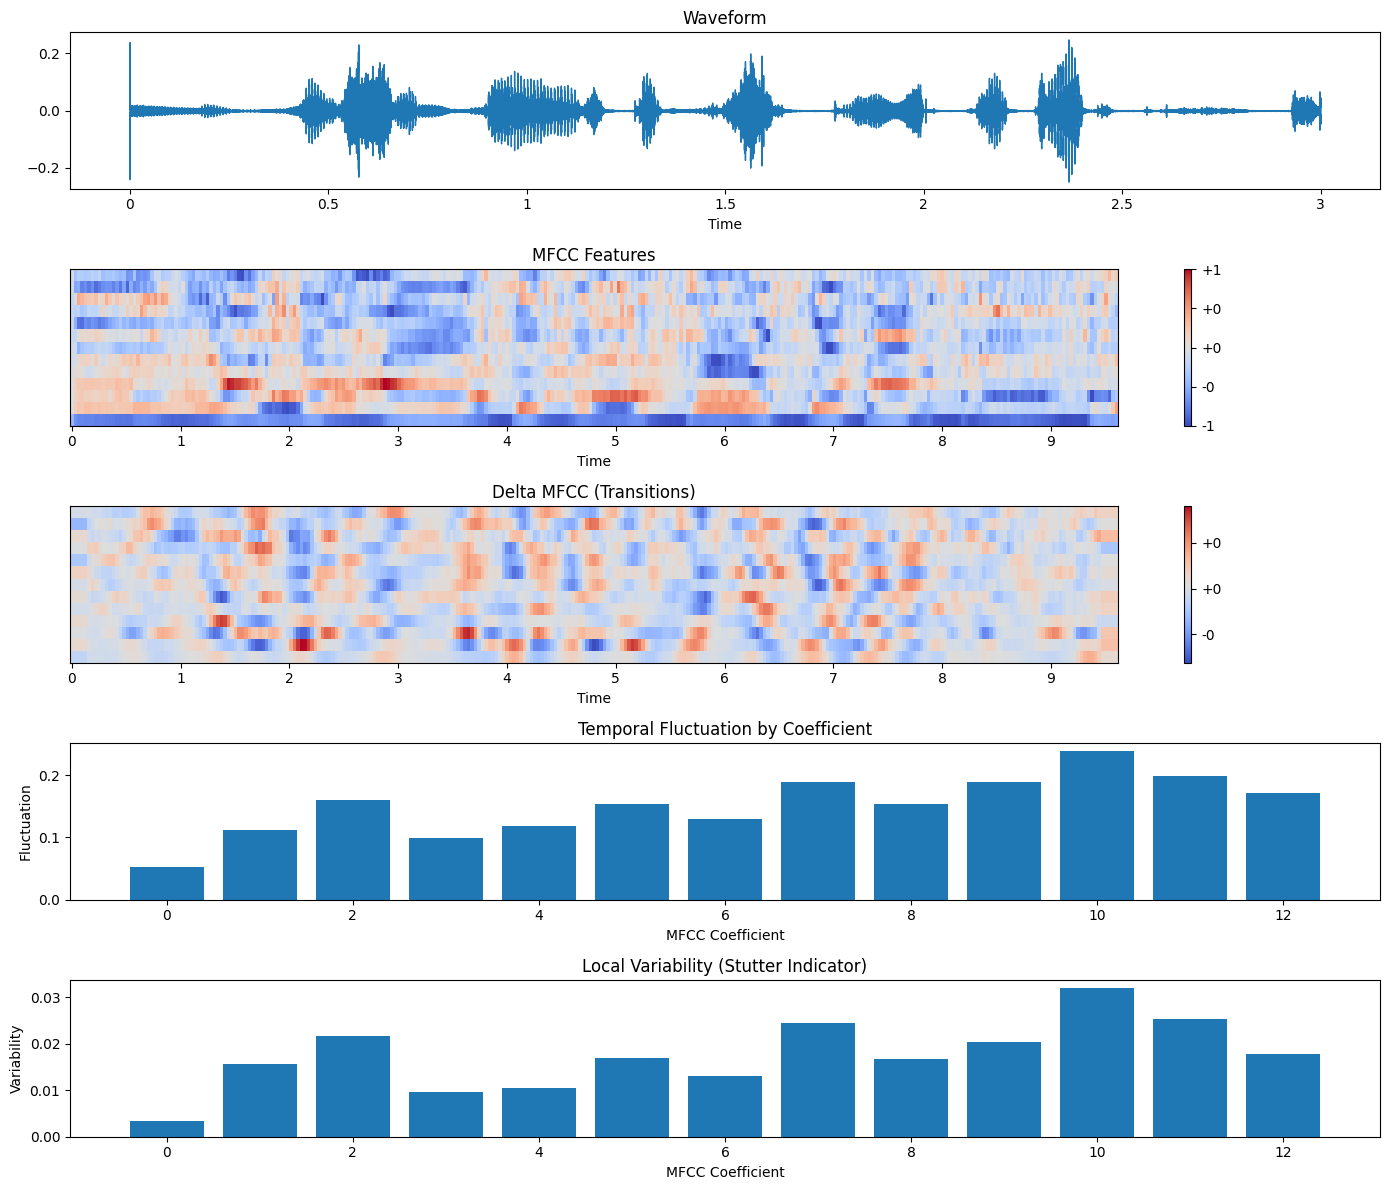


MFCC Statistics for Stutter Detection:
Overall MFCC Stability: 0.1513
Transition Rate: 0.1133

Individual Coefficients:
MFCC 1: Mean = -0.7495, Std = 0.1464, Fluctuation = 0.0530
MFCC 2: Mean = -0.0244, Std = 0.3463, Fluctuation = 0.1119
MFCC 3: Mean = -0.0672, Std = 0.4081, Fluctuation = 0.1597
MFCC 4: Mean = 0.1196, Std = 0.2937, Fluctuation = 0.0997
MFCC 5: Mean = -0.0729, Std = 0.2436, Fluctuation = 0.1190
MFCC 6: Mean = -0.0724, Std = 0.2808, Fluctuation = 0.1531
MFCC 7: Mean = -0.2266, Std = 0.2498, Fluctuation = 0.1296
MFCC 8: Mean = -0.1255, Std = 0.2950, Fluctuation = 0.1887
MFCC 9: Mean = -0.2410, Std = 0.2641, Fluctuation = 0.1543
MFCC 10: Mean = -0.1485, Std = 0.3111, Fluctuation = 0.1889
MFCC 11: Mean = -0.1302, Std = 0.2871, Fluctuation = 0.2392
MFCC 12: Mean = -0.2254, Std = 0.3156, Fluctuation = 0.1980
MFCC 13: Mean = -0.2376, Std = 0.2602, Fluctuation = 0.1714


In [ ]:
# Test MFCC extraction on a sample clip
def test_mfcc_extraction(clips_df, clip_index=6):
    """Test MFCC feature extraction on a sample clip"""
    if len(clips_df) <= clip_index:
        print(f"Error: clip index {clip_index} out of range. Dataset has {len(clips_df)} clips.")
        return

    sample_clip = clips_df.iloc[clip_index]
    file_path = sample_clip['file_path']

    print(f"Testing MFCC extraction on clip {sample_clip['clip_id']}:")
    print(f"File path: {file_path}")
    print(f"Has stutter: {sample_clip['has_stutter']}")

    if sample_clip['has_stutter']:
        stutter_types = [st for st in STUTTER_TYPES if sample_clip[st]]
        print(f"Stutter types: {', '.join(stutter_types)}")

    # Extract and visualize MFCC features
    mfcc_features = extract_mfcc_features(file_path, visualize=True)

    return mfcc_features

# Run the test
mfcc_test_result = test_mfcc_extraction(clips_df)


In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import warnings
import traceback


def autocorrelation_pitch(signal, sr, frame_size=2048, hop_size=512, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7')):
    pitches = []
    times = []

    for i in range(0, len(signal) - frame_size, hop_size):
        frame = signal[i:i+frame_size]
        frame = frame * np.hamming(frame_size)  # apply Hamming window

        # Autocorrelation
        corr = np.correlate(frame, frame, mode='full')
        corr = corr[len(corr)//2:]  # keep second half

        # Define min and max lag for pitch detection
        min_lag = int(sr / fmax)
        max_lag = int(sr / fmin)

        # Find peak in the expected range
        if max_lag >= len(corr):
            continue
        peak_index = np.argmax(corr[min_lag:max_lag]) + min_lag
        peak_value = corr[peak_index]

        # Optional: thresholding
        if peak_value > 0.3 * corr[0]:  # only if peak is strong enough
            pitch = sr / peak_index
        else:
            pitch = 0  # unvoiced

        # pitch = sr/peak_index

        time = i / sr
        pitches.append(pitch)
        times.append(time)

    return np.array(times), np.array(pitches)

def extract_prosodic_features(audio_path, sr=16000, visualize=False):
    """
    Extract prosodic features from an audio clip using signal processing techniques.

    This function implements:
      - Pitch estimation via an autocorrelation–based method (as a surrogate for VOP/GVV based approaches)
      - RMS energy computation (time-domain energy)
      - Zero Crossing Rate (ZCR)
      - Speech rate estimation from a simple peak detection on the RMS envelope
      - Jitter (cycle-to-cycle pitch period variation)
      - Shimmer (variation in amplitude envelope)
      - HNR (using a basic autocorrelation measure)

    The function returns a dictionary containing:
        'f0_raw': Array of per-frame pitch estimates,
        'f0_valid': Valid (non-zero) pitch estimates,
        'f0_mean': Mean pitch (Hz),
        'f0_std': Std. dev. pitch,
        'f0_min': Minimum pitch,
        'f0_max': Maximum pitch,
        'f0_range': Pitch range,
        'rms_raw': RMS energy per frame,
        'rms_mean': Mean RMS energy,
        'rms_std': STD of RMS,
        'zcr_raw': Zero-crossing rate per frame,
        'zcr_mean': Mean ZCR,
        'zcr_std': STD of ZCR,
        'speech_rate': Estimated speech rate (onsets per second),
        'jitter': Relative pitch period variability,
        'shimmer': Relative amplitude variability,
        'hnr_estimate': Estimated Harmonics-to-Noise Ratio (dB)

    All pitch extraction is performed using custom auto-correlation based method.
    """
    try:
        y, sr = librosa.load(audio_path, sr=sr)
        y = librosa.effects.preemphasis(y, coef=0.97)
        frame_length = int(0.5 * sr)  # 25 ms window
        hop_length = int(0.050 * sr)    # 10 ms hop

        # Compute pitch using our autocorrelation method:
        times, f0 = autocorrelation_pitch(y, sr)
        valid_idx = f0 > 0
        if np.sum(valid_idx) > 0:
            f0_valid = f0[valid_idx]
            f0_mean = np.mean(f0_valid)
            f0_std = np.std(f0_valid)
            f0_min = np.min(f0_valid)
            f0_max = np.max(f0_valid)
            f0_range = f0_max - f0_min
        else:
            f0_valid = np.array([])
            f0_mean = f0_std = f0_min = f0_max = f0_range = 0.0

        # Compute RMS energy on the same frames:
        frames = []
        num_frames = 1 + (len(y) - frame_length) // hop_length
        for i in range(num_frames):
            frame = y[i*hop_length : i*hop_length + frame_length]
            frames.append(frame)
        frames = np.array(frames)
        rms = np.sqrt(np.mean(frames**2, axis=1))
        rms_mean = np.mean(rms)
        rms_std  = np.std(rms)

        # Compute Zero Crossing Rate (ZCR)
        def compute_zcr(signal):
            return np.sum(np.abs(np.diff(np.sign(signal)))) / (2 * len(signal))
        zcr = np.array([compute_zcr(frame) for frame in frames])
        zcr_mean = np.mean(zcr)
        zcr_std  = np.std(zcr)

        # Speech rate: Count peaks in RMS (as a rough onset detector)
        median_rms = np.median(rms)
        peak_count = 0
        for i in range(1, len(rms)-1):
            if rms[i] > rms[i-1] and rms[i] > rms[i+1] and rms[i] > 1.5*median_rms:
                peak_count += 1
        speech_rate = peak_count / (len(y)/sr)  # peaks per second

        # Jitter: Relative variation in pitch period
        if f0_mean > 0 and np.sum(valid_idx) > 1:
            periods = 1 / f0_valid
            jitter = np.mean(np.abs(np.diff(periods))) / np.mean(periods)
        else:
            jitter = 0.0

        # Shimmer: Relative variation in amplitude envelope (using RMS values)
        if rms_mean > 0 and len(rms) > 1:
            shimmer = np.mean(np.abs(np.diff(rms))) / rms_mean
        else:
            shimmer = 0.0

        # HNR: Estimate using autocorrelation of the full signal.
        ac = np.correlate(y, y, mode='full')[len(y)-1:]
        r0 = ac[0]
        if r0 > 0 and len(ac) > 1:
            r_max = np.max(ac[1:])
            if (r0 - r_max) > 1e-8:
                hnr_estimate = 10 * np.log10(r_max / (r0 - r_max))
            else:
                hnr_estimate = 0.0
        else:
            hnr_estimate = 0.0

        features = {
            'f0_raw': f0,
            'f0_valid': f0_valid,
            'f0_mean': f0_mean,
            'f0_std': f0_std,
            'f0_min': f0_min,
            'f0_max': f0_max,
            'f0_range': f0_range,
            'rms_raw': rms,
            'rms_mean': rms_mean,
            'rms_std': rms_std,
            'zcr_raw': zcr,
            'zcr_mean': zcr_mean,
            'zcr_std': zcr_std,
            'speech_rate': speech_rate,
            'jitter': jitter,
            'shimmer': shimmer,
            'hnr_estimate': hnr_estimate
        }

        if visualize:
            plt.figure(figsize=(14, 12))
            # Plot waveform
            plt.subplot(5, 1, 1)
            librosa.display.waveshow(y, sr=sr)
            plt.title('Waveform')
            # Plot pitch contour
            plt.subplot(5, 1, 2)
            plt.plot(times, f0, markersize=2)
            plt.title('Pitch (F0) Contour (Autocorrelation based)')
            plt.ylabel('Frequency (Hz)')
            # Plot RMS energy
            plt.subplot(5, 1, 3)
            times_rms = librosa.times_like(rms, sr=sr)
            plt.plot(times_rms, rms)
            plt.title('RMS Energy')
            plt.ylabel('Amplitude')
            # Plot ZCR
            plt.subplot(5, 1, 4)
            times_zcr = librosa.times_like(zcr, sr=sr)
            plt.plot(times_zcr, zcr)
            plt.title('Zero Crossing Rate')
            plt.ylabel('Rate')
            # Plot Mel spectrogram for reference
            plt.subplot(5, 1, 5)
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
            S_dB = librosa.power_to_db(S, ref=np.max)
            librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
            plt.colorbar(format='%+2.0f dB')
            plt.title('Mel Spectrogram')
            plt.tight_layout()
            plt.show()

        return features
    except Exception as e:
        print(f"Error in extract_prosodic_features: {str(e)}")
        traceback.print_exc()
        return None



Testing prosodic feature extraction on clip 129:
File path: ./clips/He_Stutters_Podcast_–_Make_Room_For_The_Stuttering/episode-208-with-kelsey-h/129.wav
Has stutter: True
Stutter types: Prolongation, Block, SoundRep
Playing audio clip...


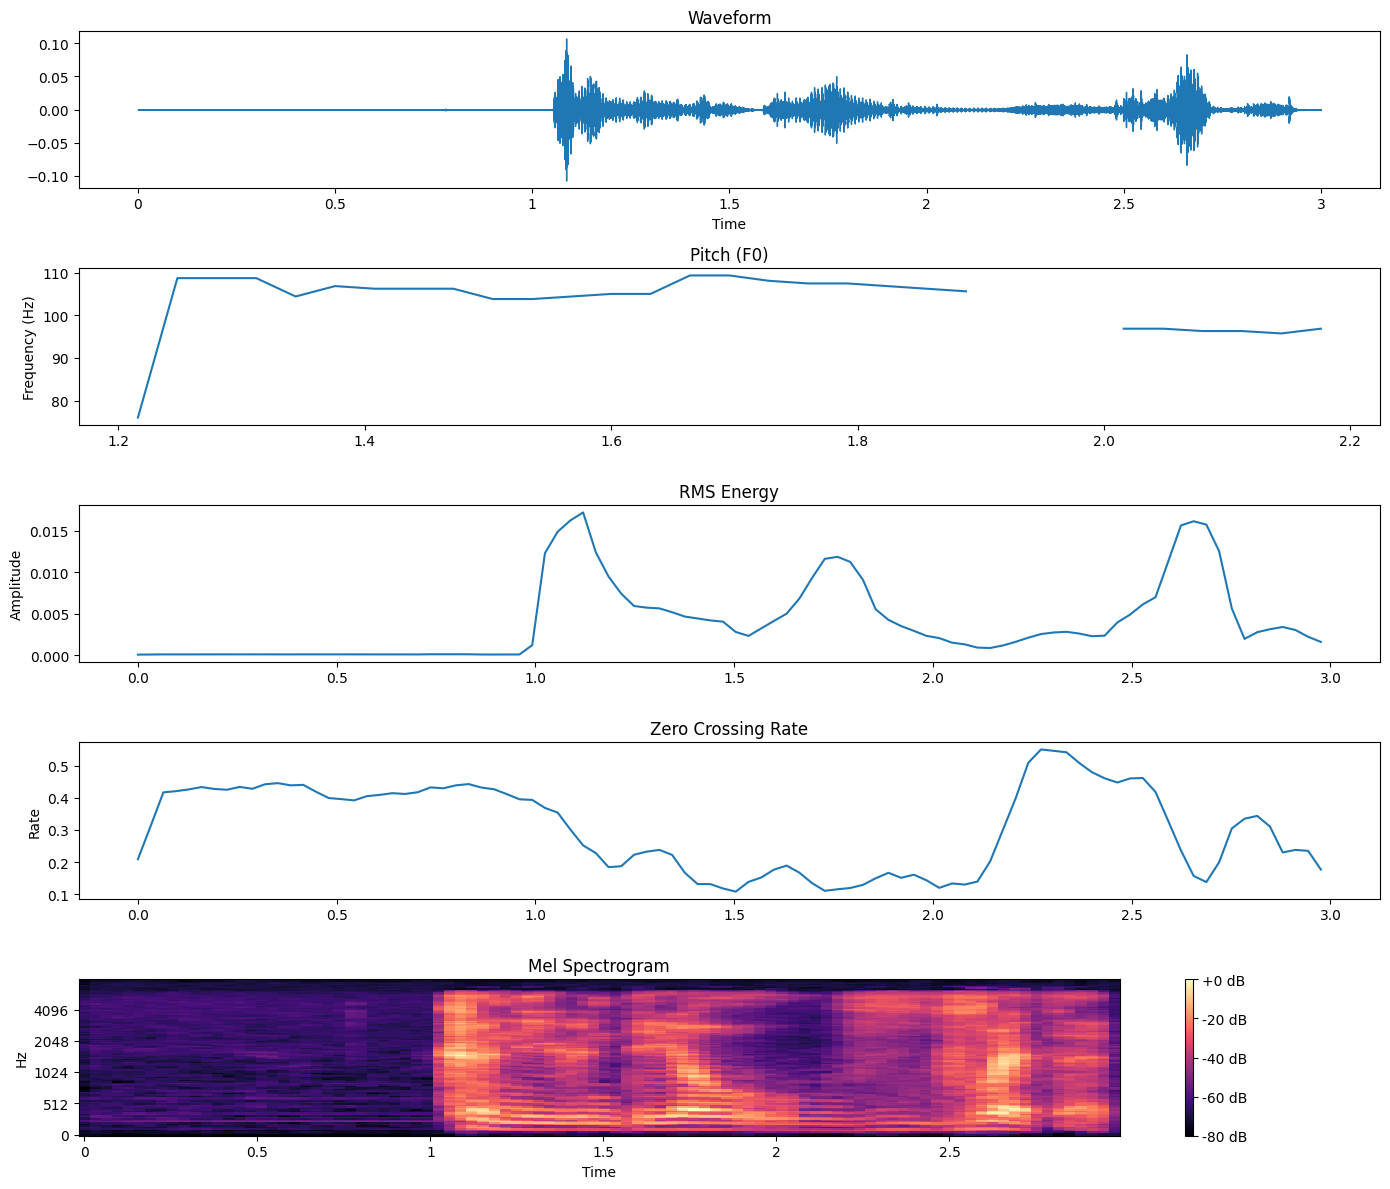


Prosodic Features:
Mean F0: 103.36 Hz
F0 Range: 33.36 Hz
Speech Rate: 4.00 onsets/sec
Jitter: 0.0225
Shimmer: 0.1764
HNR Estimate: -59.18 dB


In [ ]:
def test_prosodic_extraction(clips_df, clip_index=5):
    """Test prosodic feature extraction on a sample clip"""
    if len(clips_df) <= clip_index:
        print(f"Error: clip index {clip_index} out of range. Dataset has {len(clips_df)} clips.")
        return

    sample_clip = clips_df.iloc[clip_index]
    file_path = sample_clip['file_path']

    print(f"Testing prosodic feature extraction on clip {sample_clip['clip_id']}:")
    print(f"File path: {file_path}")
    print(f"Has stutter: {sample_clip['has_stutter']}")

    if sample_clip['has_stutter']:
        stutter_types = [st for st in STUTTER_TYPES if sample_clip[st]]
        print(f"Stutter types: {', '.join(stutter_types)}")

    # Extract and visualize prosodic features
    prosodic_features = extract_prosodic_features(file_path, visualize=True)

    return prosodic_features

# Run the test
prosodic_test_result = test_prosodic_extraction(clips_df)


Testing word-level feature extraction on clip 42:
File path: ./clips/He_Stutters_Podcast_–_Make_Room_For_The_Stuttering/episode-208-with-kelsey-h/42.wav
Has stutter: True
Stutter types: Prolongation, Block, SoundRep, WordRep
Playing audio clip...


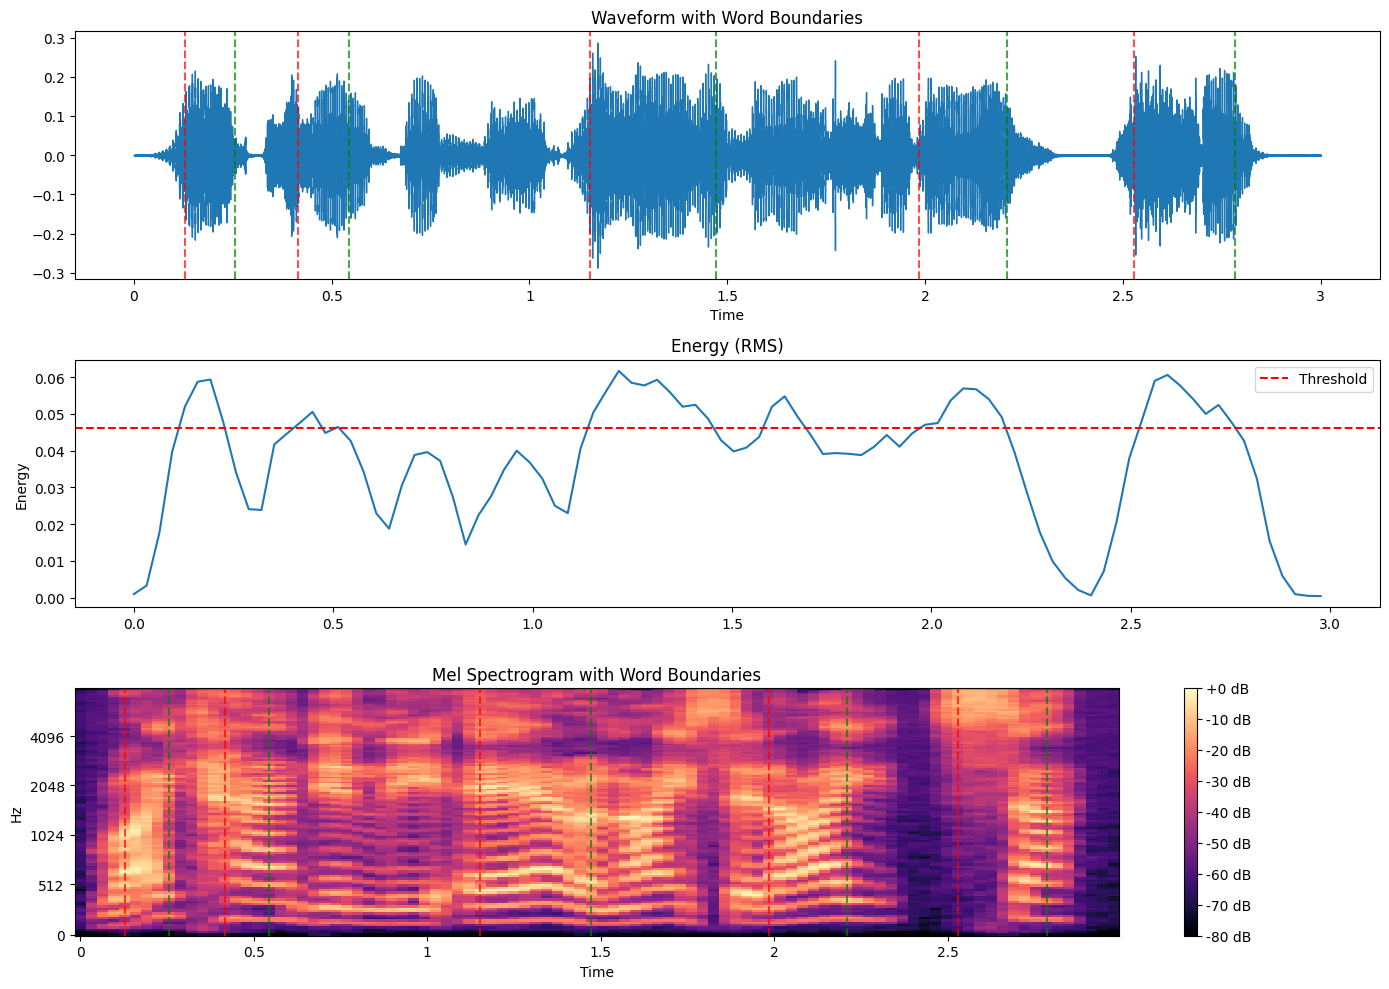


Detected 5 words

Word 1:
  Duration: 0.128 sec
  Playing word audio...


  Jitter: 0.0000 (>0.015 indicates potential stutter)
  Shimmer: 0.1841 (>0.035 indicates potential stutter)
  HNR: -2.64 dB (<18 dB indicates potential stutter)
  MFCC Stability: 0.1919 (>0.12 indicates potential stutter)

Word 2:
  Duration: 0.128 sec
  Playing word audio...


  Jitter: 0.0000 (>0.015 indicates potential stutter)
  Shimmer: 0.1812 (>0.035 indicates potential stutter)
  HNR: 6.23 dB (<18 dB indicates potential stutter)
  MFCC Stability: 0.2382 (>0.12 indicates potential stutter)

Word 3:
  Duration: 0.320 sec
  Playing word audio...


  Jitter: 0.0792 (>0.015 indicates potential stutter)
  Shimmer: 0.0869 (>0.035 indicates potential stutter)
  HNR: 1.30 dB (<18 dB indicates potential stutter)
  MFCC Stability: 0.1590 (>0.12 indicates potential stutter)

Word 4:
  Duration: 0.224 sec
  Playing word audio...


  Jitter: 0.0000 (>0.015 indicates potential stutter)
  Shimmer: 0.1211 (>0.035 indicates potential stutter)
  HNR: -3.01 dB (<18 dB indicates potential stutter)
  MFCC Stability: 0.1805 (>0.12 indicates potential stutter)

Word 5:
  Duration: 0.256 sec
  Playing word audio...


  Jitter: 0.0000 (>0.015 indicates potential stutter)
  Shimmer: 0.1041 (>0.035 indicates potential stutter)
  HNR: -7.55 dB (<18 dB indicates potential stutter)
  MFCC Stability: 0.2358 (>0.12 indicates potential stutter)


In [ ]:



import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.stats
from sklearn.preprocessing import StandardScaler
import traceback

def extract_word_level_features(audio_path, sr=16000, max_words=20, visualize=False):
    """
    Extract features at word level from an audio clip with enhanced features for stutter detection
    """
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=sr)

        # Apply pre-emphasis filter
        pre_emphasis = 0.97
        y = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

        # Compute energy
        hop_length = 512
        energy = librosa.feature.rms(y=y, hop_length=hop_length)[0]

        # Calculate silence threshold (adaptive)
        silence_threshold = np.mean(energy) + 0.5 * np.std(energy)

        # Find silent regions (potential word boundaries)
        silences = []
        in_silence = True
        start_idx = 0

        # Minimum silence duration in frames (150ms typical between words)
        min_silence_frames = int(0.15 * sr / hop_length)

        for i, e in enumerate(energy):
            if in_silence and e > silence_threshold:
                # End of silence
                if i - start_idx >= min_silence_frames:
                    silences.append((start_idx, i))
                in_silence = False
            elif not in_silence and e <= silence_threshold:
                # Start of silence
                start_idx = i
                in_silence = True

        # Handle final silence
        if in_silence and len(energy) - start_idx >= min_silence_frames:
            silences.append((start_idx, len(energy)))

        # Convert silences to word segments
        word_segments = []

        # Add segment from start to first silence
        if silences and silences[0][0] > 0:
            word_segments.append((0, librosa.frames_to_samples(silences[0][0], hop_length=hop_length)))
        elif not silences:
            word_segments.append((0, len(y)))  # No silences, treat whole clip as one word

        # Add segments between silences
        for i in range(len(silences)-1):
            start = librosa.frames_to_samples(silences[i][1], hop_length=hop_length)
            end = librosa.frames_to_samples(silences[i+1][0], hop_length=hop_length)
            if end - start > sr * 0.1:  # Only keep segments longer than 100ms
                word_segments.append((start, end))

        # Add segment from last silence to end
        if silences and silences[-1][1] < len(energy):
            start = librosa.frames_to_samples(silences[-1][1], hop_length=hop_length)
            if len(y) - start > sr * 0.1:
                word_segments.append((start, len(y)))

        # If no word segments found, use whole clip
        if not word_segments:
            word_segments = [(0, len(y))]

        # Limit to max_words
        word_segments = word_segments[:max_words]

        # Initialize feature collections
        word_features = {}
        word_features['word_count'] = len(word_segments)
        word_features['word_segments'] = word_segments
        word_features['features_per_word'] = []

        # Extract features for each word
        for i, (start, end) in enumerate(word_segments):
            # Extract word audio
            word_audio = y[start:end]

            # Skip very short segments
            if len(word_audio) < sr * 0.05:  # < 50ms
                continue

            # Extract enhanced features for this word
            word_feature_dict = extract_enhanced_word_features(word_audio, sr, i)
            word_features['features_per_word'].append(word_feature_dict)

        # Store raw audio for visualization
        word_features['raw_audio'] = y
        word_features['sr'] = sr

        # Visualize if requested
        if visualize:
            plt.figure(figsize=(14, 10))

            # Play audio
            print("Playing audio clip...")
            ipd.display(ipd.Audio(y, rate=sr))

            # Plot waveform with word boundaries
            plt.subplot(3, 1, 1)
            librosa.display.waveshow(y, sr=sr)
            plt.title('Waveform with Word Boundaries')

            # Add vertical lines for word boundaries
            for start, end in word_segments:
                plt.axvline(x=start/sr, color='r', linestyle='--', alpha=0.7)
                plt.axvline(x=end/sr, color='g', linestyle='--', alpha=0.7)

            # Plot energy
            plt.subplot(3, 1, 2)
            times = librosa.times_like(energy, sr=sr, hop_length=hop_length)
            plt.plot(times, energy)
            plt.axhline(y=silence_threshold, color='r', linestyle='--', label='Threshold')
            plt.title('Energy (RMS)')
            plt.ylabel('Energy')
            plt.legend()

            # Plot spectrogram
            plt.subplot(3, 1, 3)
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
            S_dB = librosa.power_to_db(S, ref=np.max)
            librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
            plt.colorbar(format='%+2.0f dB')
            plt.title('Mel Spectrogram with Word Boundaries')

            # Add vertical lines for word boundaries on spectrogram
            for start, end in word_segments:
                plt.axvline(x=start/sr, color='r', linestyle='--', alpha=0.7)
                plt.axvline(x=end/sr, color='g', linestyle='--', alpha=0.7)

            plt.tight_layout()
            plt.show()

            # Print key statistics
            print(f"\nDetected {word_features['word_count']} words")

            # Display features for each word
            for i, (start, end) in enumerate(word_segments):
                if i < len(word_features['features_per_word']):
                    word_feat = word_features['features_per_word'][i]
                    duration = (end - start) / sr

                    print(f"\nWord {i+1}:")
                    print(f"  Duration: {duration:.3f} sec")

                    # Play word audio
                    word_audio = y[start:end]
                    print(f"  Playing word audio...")
                    ipd.display(ipd.Audio(word_audio, rate=sr))

                    # Print stutter-relevant features
                    print(f"  Jitter: {word_feat['jitter']:.4f} (>0.015 indicates potential stutter)")
                    print(f"  Shimmer: {word_feat['shimmer']:.4f} (>0.035 indicates potential stutter)")
                    print(f"  HNR: {word_feat['hnr']:.2f} dB (<18 dB indicates potential stutter)")
                    print(f"  MFCC Stability: {word_feat['mfcc_stability']:.4f} (>0.12 indicates potential stutter)")

        return word_features

    except Exception as e:
        print(f"Error extracting word-level features: {str(e)}")
        traceback.print_exc()
        return None


def extract_enhanced_word_features(word_audio, sr, word_index):
    """
    Extract enhanced MFCC and prosodic features optimized for stutter detection
    """
    features = {}

    # Basic metadata
    features['word_index'] = word_index
    features['duration'] = len(word_audio) / sr

    try:
        # 1. Enhanced MFCC features
        mfcc = librosa.feature.mfcc(
            y=word_audio,
            sr=sr,
            n_mfcc=13,
            n_fft=int(0.025*sr),
            hop_length=int(0.010*sr),
            lifter=22
        )

        # Normalize MFCCs
        mfcc = librosa.util.normalize(mfcc, axis=1)

        # Compute delta and delta-delta features
        delta_mfcc = librosa.feature.delta(mfcc)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)

        # Calculate temporal fluctuation (important for stutter detection)
        temporal_fluctuation = np.std(np.diff(mfcc, axis=1), axis=1)

        # Calculate local variability (rapid changes indicate stutter)
        local_variability = []
        for i in range(mfcc.shape[0]):
            if mfcc[i].shape[0] >= 5:  # Ensure enough frames
                rolled = np.lib.stride_tricks.sliding_window_view(mfcc[i], 5)
                local_variability.append(np.mean(np.var(rolled, axis=1)))
            else:
                local_variability.append(0)

        # Store MFCC features
        features['mfcc_mean'] = np.mean(mfcc, axis=1).tolist()
        features['mfcc_std'] = np.std(mfcc, axis=1).tolist()
        features['delta_mean'] = np.mean(delta_mfcc, axis=1).tolist()
        features['delta2_mean'] = np.mean(delta2_mfcc, axis=1).tolist()
        features['temporal_fluctuation'] = temporal_fluctuation.tolist()
        features['local_variability'] = local_variability
        features['mfcc_stability'] = np.mean(temporal_fluctuation)
        features['transition_rate'] = np.mean(np.abs(np.diff(mfcc, axis=1)))

        # 2. Enhanced prosodic features
        # Pitch (F0) extraction
        f0, voiced_flag, _ = librosa.pyin(
            word_audio,
            fmin=80,
            fmax=400,
            sr=sr
        )
        f0_valid = f0[~np.isnan(f0)]

        # Jitter calculation (cycle-to-cycle frequency variation)
        if len(f0_valid) > 1:
            jitter = np.mean(np.abs(np.diff(f0_valid))) / np.mean(f0_valid)
            # Relative Average Perturbation (RAP)
            if len(f0_valid) > 2:
                rap = np.mean(np.abs(f0_valid[1:-1] - (f0_valid[:-2] + f0_valid[1:-1] + f0_valid[2:])/3)) / np.mean(f0_valid)
            else:
                rap = 0
        else:
            jitter = 0
            rap = 0

        # Shimmer calculation (cycle-to-cycle amplitude variation)
        amplitude = librosa.feature.rms(y=word_audio)[0]
        if len(amplitude) > 1:
            shimmer = np.mean(np.abs(np.diff(amplitude))) / np.mean(amplitude)
            # Amplitude Perturbation Quotient (APQ)
            if len(amplitude) > 4:
                apq = np.mean(np.abs(amplitude[2:-2] - np.mean(np.lib.stride_tricks.sliding_window_view(amplitude, 5), axis=1))) / np.mean(amplitude)
            else:
                apq = 0
        else:
            shimmer = 0
            apq = 0

        # Harmonics-to-Noise Ratio (HNR)
        harmonic, percussive = librosa.effects.hpss(word_audio)
        hnr = 10 * np.log10(np.sum(harmonic**2) / (np.sum(percussive**2) + 1e-10))

        # Zero Crossing Rate
        zcr = librosa.feature.zero_crossing_rate(y=word_audio)[0]

        # Store prosodic features
        features['f0_mean'] = np.mean(f0_valid) if len(f0_valid) > 0 else 0
        features['f0_std'] = np.std(f0_valid) if len(f0_valid) > 0 else 0
        features['jitter'] = jitter
        features['rap'] = rap
        features['shimmer'] = shimmer
        features['apq'] = apq
        features['hnr'] = hnr
        features['zcr_mean'] = np.mean(zcr)
        features['zcr_std'] = np.std(zcr)
        features['voiced_ratio'] = np.sum(~np.isnan(f0)) / len(f0) if len(f0) > 0 else 0

        # 3. Stutter-specific metrics
        # Repetition indicator (high local variability with low global variability)
        features['repetition_score'] = np.mean(local_variability) / (np.mean(features['mfcc_std']) + 1e-10)

        # Prolongation indicator (low jitter with high duration)
        features['prolongation_score'] = features['duration'] * (1 - min(jitter * 10, 1))

        # Block indicator (low energy with high ZCR)
        features['block_score'] = features['zcr_mean'] * (1 - min(np.mean(amplitude) * 10, 1))

        return features

    except Exception as e:
        print(f"Error extracting enhanced word features: {str(e)}")
        # Return basic features if extraction fails
        return {
            'word_index': word_index,
            'duration': len(word_audio) / sr,
            'error': str(e)
        }


def test_word_level_extraction(clips_df, clip_index=5):
    """Test word-level feature extraction on a sample clip"""
    if len(clips_df) <= clip_index:
        print(f"Error: clip index {clip_index} out of range. Dataset has {len(clips_df)} clips.")
        return
wor
    sample_clip = clips_df.iloc[clip_index]
    file_path = sample_clip['file_path']

    print(f"Testing word-level feature extraction on clip {sample_clip['clip_id']}:")
    print(f"File path: {file_path}")
    print(f"Has stutter: {sample_clip['has_stutter']}")

    if sample_clip['has_stutter']:
        stutter_types = [st for st in ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']
                         if st in sample_clip and sample_clip[st]]
        print(f"Stutter types: {', '.join(stutter_types)}")

    # Extract and visualize word-level features
    word_features = extract_word_level_features(file_path, visualize=True)

    return word_features

# Example usage:
word_test_result = test_word_level_extraction(clips_df, clip_index=5)

Testing word-level feature extraction on clip 140:
File path: ./clips/He_Stutters_Podcast_–_Make_Room_For_The_Stuttering/episode-208-with-kelsey-h/140.wav
Has stutter: True
Stutter types: Prolongation
Playing audio clip...


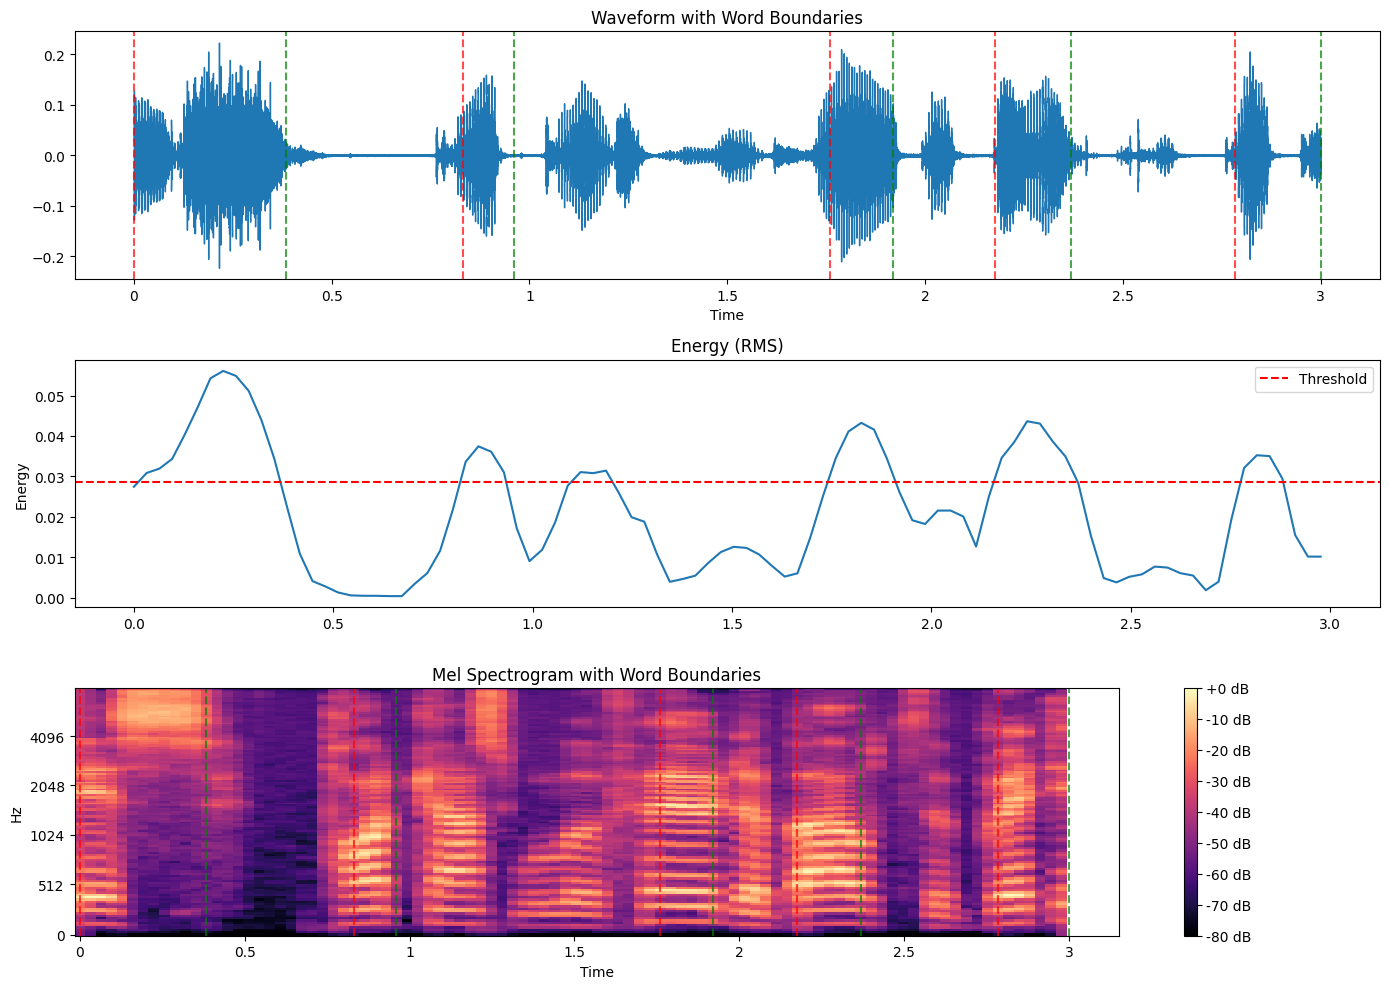


Detected 5 words

Word 1:
  Duration: 0.384 sec
  Playing word audio...


  Jitter: 0.0114 (>0.015 indicates potential stutter)
  Shimmer: 0.1282 (>0.035 indicates potential stutter)
  HNR: -8.24 dB (<18 dB indicates potential stutter)
  MFCC Stability: 0.2418 (>0.12 indicates potential stutter)

Word 2:
  Duration: 0.128 sec
  Playing word audio...


  Jitter: 0.0043 (>0.015 indicates potential stutter)
  Shimmer: 0.1911 (>0.035 indicates potential stutter)
  HNR: 6.66 dB (<18 dB indicates potential stutter)
  MFCC Stability: 0.2322 (>0.12 indicates potential stutter)

Word 3:
  Duration: 0.160 sec
  Playing word audio...


  Jitter: 0.0035 (>0.015 indicates potential stutter)
  Shimmer: 0.1651 (>0.035 indicates potential stutter)
  HNR: 17.08 dB (<18 dB indicates potential stutter)
  MFCC Stability: 0.1774 (>0.12 indicates potential stutter)

Word 4:
  Duration: 0.192 sec
  Playing word audio...


  Jitter: 0.0058 (>0.015 indicates potential stutter)
  Shimmer: 0.1104 (>0.035 indicates potential stutter)
  HNR: 8.48 dB (<18 dB indicates potential stutter)
  MFCC Stability: 0.1948 (>0.12 indicates potential stutter)

Word 5:
  Duration: 0.216 sec
  Playing word audio...


  Jitter: 0.0287 (>0.015 indicates potential stutter)
  Shimmer: 0.1952 (>0.035 indicates potential stutter)
  HNR: 0.98 dB (<18 dB indicates potential stutter)
  MFCC Stability: 0.2686 (>0.12 indicates potential stutter)


In [ ]:
def test_word_level_extraction(clips_df, clip_index=4):
    """Test word-level feature extraction on a sample clip"""
    if len(clips_df) <= clip_index:
        print(f"Error: clip index {clip_index} out of range. Dataset has {len(clips_df)} clips.")
        return

    sample_clip = clips_df.iloc[clip_index]
    file_path = sample_clip['file_path']

    print(f"Testing word-level feature extraction on clip {sample_clip['clip_id']}:")
    print(f"File path: {file_path}")
    print(f"Has stutter: {sample_clip['has_stutter']}")

    if sample_clip['has_stutter']:
        stutter_types = [st for st in STUTTER_TYPES if sample_clip[st]]
        print(f"Stutter types: {', '.join(stutter_types)}")

    # Extract and visualize word-level features
    word_features = extract_word_level_features(file_path, visualize=True)

    return word_features

# Run the test
word_test_result = test_word_level_extraction(clips_df)


https://www.isca-archive.org/eurospeech_2003/nagarajan03_eurospeech.pdf using this group delay function for syllable level segments

In [ ]:


import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import traceback
from scipy.signal import lfilter
import scipy.stats

def extract_syllable_level_features(audio_path, sr=16000, visualize=False):
    """
    Extract syllable-level features using group delay function approach from Nagarajan et al. (2003)
    with enhanced features for stutter detection.

    Parameters:
        audio_path (str): Path to the audio file
        sr (int): Sampling rate
        visualize (bool): Whether to visualize the features

    Returns:
        dict: Dictionary containing syllable-level features
    """
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=sr)

        # Apply pre-emphasis filter
        pre_emphasis = 0.97
        y = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

        # Create three sub-bands as described in the paper
        # 1. Original signal
        y_original = y.copy()

        # 2. Low-pass filtered signal (to remove fricatives)
        b_low = [1.0, -0.97]
        a_low = [1.0]
        y_low = lfilter(b_low, a_low, y)

        # 3. Band-pass filtered signal (to attenuate semivowels)
        D = librosa.stft(y, n_fft=1024, hop_length=256)
        D_mid = D.copy()
        D_mid[:20] = 0
        D_mid[50:] = 0
        y_mid = librosa.istft(D_mid, hop_length=256)

        # Ensure all signals have the same length by truncating to the minimum length
        min_length = min(len(y_original), len(y_low), len(y_mid))
        y_original = y_original[:min_length]
        y_low = y_low[:min_length]
        y_mid = y_mid[:min_length]

        # Compute short-term energy functions for each sub-band with the same parameters
        hop_length = 128
        frame_length = 512
        energy_original = librosa.feature.rms(y=y_original, frame_length=frame_length, hop_length=hop_length)[0]
        energy_low = librosa.feature.rms(y=y_low, frame_length=frame_length, hop_length=hop_length)[0]
        energy_mid = librosa.feature.rms(y=y_mid, frame_length=frame_length, hop_length=hop_length)[0]

        # Normalize energy functions
        energy_original = energy_original / np.max(energy_original) if np.max(energy_original) > 0 else energy_original
        energy_low = energy_low / np.max(energy_low) if np.max(energy_low) > 0 else energy_low
        energy_mid = energy_mid / np.max(energy_mid) if np.max(energy_mid) > 0 else energy_mid

        # Function to compute minimum phase group delay function
        def compute_group_delay(energy):
            # 1. Create symmetric energy sequence
            energy_sym = np.concatenate([energy, energy[::-1]])

            # 2. Invert the sequence (since we're interested in valleys)
            energy_inv = 1.0 - energy_sym

            # 3. Compute root cepstrum (inverse DFT)
            root_cepstrum = np.fft.ifft(energy_inv).real

            # 4. Window the causal part (minimum phase signal)
            window_size = int(len(root_cepstrum) * 0.1)
            windowed_cepstrum = root_cepstrum[:window_size].copy()

            # 5. Compute group delay function
            group_delay = np.zeros_like(energy)
            for n in range(len(group_delay)):
                for k in range(min(window_size, len(windowed_cepstrum))):
                    group_delay[n] += k * windowed_cepstrum[k] * np.cos(2 * np.pi * k * n / len(energy))

            return group_delay

        # Compute group delay functions for each sub-band
        gd_original = compute_group_delay(energy_original)
        gd_low = compute_group_delay(energy_low)
        gd_mid = compute_group_delay(energy_mid)

        # Detect peaks in each group delay function
        def find_peaks(gd, threshold=0.2):
            peaks = []
            for i in range(1, len(gd) - 1):
                if gd[i] > gd[i-1] and gd[i] > gd[i+1] and gd[i] > threshold:
                    peaks.append(i)
            return peaks

        peaks_original = find_peaks(gd_original)
        peaks_low = find_peaks(gd_low)
        peaks_mid = find_peaks(gd_mid)

        # Convert peak indices to time (in samples)
        peaks_original_samples = [p * hop_length for p in peaks_original]
        peaks_low_samples = [p * hop_length for p in peaks_low]
        peaks_mid_samples = [p * hop_length for p in peaks_mid]

        # Combine evidence from all sub-bands as per paper section 3.2.5
        combined_peaks = []

        # First, add all peaks from original signal
        combined_peaks.extend(peaks_original_samples)

        # Add peaks from low-pass filtered signal if close to original
        for peak_low in peaks_low_samples:
            # Check if within 20ms of any peak in original
            if not any(abs(peak_low - peak_orig) <= 0.02 * sr for peak_orig in peaks_original_samples):
                # Only add if not too close to existing peaks
                if not any(abs(peak_low - peak) <= 0.01 * sr for peak in combined_peaks):
                    combined_peaks.append(peak_low)

        # Add peaks from band-pass filtered signal if in specific range
        for peak_mid in peaks_mid_samples:
            # Check if within 50-100ms range from any peak in combined
            if not any(0.05 * sr <= abs(peak_mid - peak) <= 0.1 * sr for peak in combined_peaks):
                # Only add if not too close to existing peaks
                if not any(abs(peak_mid - peak) <= 0.01 * sr for peak in combined_peaks):
                    combined_peaks.append(peak_mid)

        # Sort peaks chronologically
        combined_peaks.sort()

        # Create syllable segments
        segments = []
        for i in range(len(combined_peaks) - 1):
            start = combined_peaks[i]
            end = combined_peaks[i + 1]
            # Ensure minimum syllable duration (50ms)
            if (end - start) >= 0.05 * sr:
                segments.append((start, end))

        # If no segments detected or only one boundary, use whole clip
        if len(segments) == 0 and len(combined_peaks) > 0:
            segments = [(0, combined_peaks[0]), (combined_peaks[0], len(y))]
        elif len(segments) == 0:
            segments = [(0, len(y))]

        # Extract features from each syllable
        syllable_features = {}
        syllable_features['syllable_count'] = len(segments)
        syllable_features['syllable_segments'] = segments
        syllable_features['syllable_data'] = []

        durations = []
        energies = []
        pitches = []
        mfccs_means = []
        mfccs_stds = []
        jitters = []
        shimmers = []
        hnrs = []

        # Process each syllable segment
        for i, (start, end) in enumerate(segments):
            if end <= len(y):
                syllable = y[start:end]
                duration = (end - start) / sr
                durations.append(duration)

                # Energy profile
                syl_energy = librosa.feature.rms(y=syllable)[0]
                energy_mean = np.mean(syl_energy)
                energy_std = np.std(syl_energy)
                energies.append(energy_mean)

                # MFCC features
                if len(syllable) > 512:  # Ensure enough samples for MFCC
                    mfcc = librosa.feature.mfcc(
                        y=syllable,
                        sr=sr,
                        n_mfcc=13,
                        n_fft=int(0.025*sr),
                        hop_length=int(0.010*sr)
                    )
                    mfcc_mean = np.mean(mfcc, axis=1)
                    mfcc_std = np.std(mfcc, axis=1)
                    mfccs_means.append(mfcc_mean)
                    mfccs_stds.append(mfcc_std)

                    # Calculate temporal fluctuation
                    temporal_fluctuation = np.std(np.diff(mfcc, axis=1), axis=1)
                else:
                    mfcc_mean = np.zeros(13)
                    mfcc_std = np.zeros(13)
                    temporal_fluctuation = np.zeros(13)
                    mfccs_means.append(mfcc_mean)
                    mfccs_stds.append(mfcc_std)

                # Pitch analysis
                if len(syllable) > 512:  # Ensure enough samples for pitch analysis
                    f0, voiced_flag, _ = librosa.pyin(
                        syllable,
                        fmin=librosa.note_to_hz('C2'),
                        fmax=librosa.note_to_hz('C7'),
                        sr=sr
                    )
                    f0_valid = f0[~np.isnan(f0)]

                    if len(f0_valid) > 0:
                        f0_mean = np.mean(f0_valid)
                        f0_std = np.std(f0_valid)
                        f0_stability = f0_std/f0_mean if f0_mean > 0 else 0
                        pitches.append(f0_mean)

                        # Calculate jitter (frequency perturbation)
                        if len(f0_valid) > 1:
                            jitter = np.mean(np.abs(np.diff(f0_valid))) / f0_mean if f0_mean > 0 else 0
                            jitters.append(jitter)
                        else:
                            jitter = 0
                            jitters.append(0)
                    else:
                        f0_mean = 0
                        f0_std = 0
                        f0_stability = 0
                        pitches.append(0)
                        jitter = 0
                        jitters.append(0)
                else:
                    f0_mean = 0
                    f0_std = 0
                    f0_stability = 0
                    pitches.append(0)
                    jitter = 0
                    jitters.append(0)

                # Calculate shimmer (amplitude perturbation)
                if len(syl_energy) > 1:
                    shimmer = np.mean(np.abs(np.diff(syl_energy))) / energy_mean if energy_mean > 0 else 0
                    shimmers.append(shimmer)
                else:
                    shimmer = 0
                    shimmers.append(0)

                # Calculate HNR (harmonics-to-noise ratio)
                if len(syllable) > 512:
                    harmonic, percussive = librosa.effects.hpss(syllable)
                    hnr = 10 * np.log10(np.sum(harmonic**2) / (np.sum(percussive**2) + 1e-10))
                    hnrs.append(hnr)
                else:
                    hnr = 0
                    hnrs.append(0)

                # Zero-crossing rate
                zcr = librosa.feature.zero_crossing_rate(y=syllable)[0]
                zcr_mean = np.mean(zcr)

                # Spectral centroid
                if len(syllable) > 512:
                    spectral_centroid = librosa.feature.spectral_centroid(y=syllable, sr=sr)[0]
                    centroid_mean = np.mean(spectral_centroid)
                else:
                    centroid_mean = 0

                # Store syllable features
                syllable_data = {
                    'start_time': start/sr,
                    'end_time': end/sr,
                    'duration': duration,
                    'energy_mean': energy_mean,
                    'energy_std': energy_std,
                    'f0_mean': f0_mean,
                    'f0_std': f0_std,
                    'f0_stability': f0_stability,
                    'mfcc_mean': mfcc_mean.tolist(),
                    'mfcc_std': mfcc_std.tolist(),
                    'temporal_fluctuation': temporal_fluctuation.tolist(),
                    'jitter': jitter,
                    'shimmer': shimmer,
                    'hnr': hnr,
                    'zcr_mean': zcr_mean,
                    'spectral_centroid': centroid_mean
                }

                syllable_features['syllable_data'].append(syllable_data)

        # Calculate rhythm metrics if we have enough syllables
        if len(durations) > 1:
            # Normalized Pairwise Variability Index (nPVI)
            pvi_norm = np.mean([abs(a-b)/((a+b)/2) for a, b in zip(durations[:-1], durations[1:])])

            # Calculate duration coefficient of variation
            duration_cv = np.std(durations)/np.mean(durations) if np.mean(durations) > 0 else 0

            # Calculate energy variability
            energy_cv = np.std(energies)/np.mean(energies) if np.mean(energies) > 0 else 0

            # Calculate pitch variability
            valid_pitches = [p for p in pitches if p > 0]
            pitch_cv = np.std(valid_pitches)/np.mean(valid_pitches) if len(valid_pitches) > 0 and np.mean(valid_pitches) > 0 else 0

            # Calculate jitter and shimmer variability
            jitter_cv = np.std(jitters)/np.mean(jitters) if len(jitters) > 0 and np.mean(jitters) > 0 else 0
            shimmer_cv = np.std(shimmers)/np.mean(shimmers) if len(shimmers) > 0 and np.mean(shimmers) > 0 else 0

            syllable_features.update({
                'syllable_rate': len(durations)/(segments[-1][1]/sr),
                'mean_duration': np.mean(durations),
                'duration_variability': duration_cv,
                'rhythm_pvi_norm': pvi_norm,
                'energy_variability': energy_cv,
                'pitch_variability': pitch_cv,
                'jitter_variability': jitter_cv,
                'shimmer_variability': shimmer_cv,
                'mean_jitter': np.mean(jitters),
                'mean_shimmer': np.mean(shimmers),
                'mean_hnr': np.mean(hnrs)
            })

            # Detect potential repetitions (important for stutter analysis)
            repetition_indices = []
            for i in range(len(durations)-1):
                # Check for similar consecutive syllables
                duration_ratio = min(durations[i], durations[i+1]) / max(durations[i], durations[i+1])
                energy_ratio = min(energies[i], energies[i+1]) / max(energies[i], energies[i+1])

                # If we have MFCC data, use it for similarity
                mfcc_similarity = 0
                if i < len(mfccs_means)-1:
                    mfcc_similarity = np.corrcoef(mfccs_means[i], mfccs_means[i+1])[0,1]
                    if np.isnan(mfcc_similarity):
                        mfcc_similarity = 0

                # Combine multiple factors for repetition detection
                if duration_ratio > 0.8 and energy_ratio > 0.75 and mfcc_similarity > 0.6:
                    repetition_indices.append(i)

            syllable_features['potential_repetitions'] = repetition_indices
            syllable_features['repetition_count'] = len(repetition_indices)

            # Calculate stutter-specific metrics
            # Prolongation detection (long syllables with stable pitch)
            prolongation_indices = []
            mean_duration = np.mean(durations)
            for i, duration in enumerate(durations):
                if duration > 1.5 * mean_duration and i < len(jitters) and jitters[i] < 0.015:
                    prolongation_indices.append(i)

            syllable_features['potential_prolongations'] = prolongation_indices
            syllable_features['prolongation_count'] = len(prolongation_indices)

            # Block detection (short syllables with high jitter/shimmer)
            block_indices = []
            for i, duration in enumerate(durations):
                if duration < 0.7 * mean_duration and i < len(jitters) and i < len(shimmers):
                    if jitters[i] > 0.025 or shimmers[i] > 0.04:
                        block_indices.append(i)

            syllable_features['potential_blocks'] = block_indices
            syllable_features['block_count'] = len(block_indices)

        # Visualize if requested
        if visualize:
            plt.figure(figsize=(14, 12))

            # Play audio
            print("Playing audio clip...")
            ipd.display(ipd.Audio(y, rate=sr))

            # Plot waveform with syllable boundaries
            plt.subplot(5, 1, 1)
            librosa.display.waveshow(y, sr=sr)
            for start, end in segments:
                plt.axvline(x=start/sr, color='r', linestyle='--', alpha=0.7)
                plt.axvline(x=end/sr, color='g', linestyle='--', alpha=0.7)
            plt.title('Waveform with Syllable Boundaries')

            # Generate time axis - Ensure all energy arrays have same length
            min_energy_len = min(len(energy_original), len(energy_low), len(energy_mid))
            energy_original_plot = energy_original[:min_energy_len]
            energy_low_plot = energy_low[:min_energy_len]
            energy_mid_plot = energy_mid[:min_energy_len]
            times = librosa.times_like(energy_original_plot, sr=sr, hop_length=hop_length)

            # Plot energy contours
            plt.subplot(5, 1, 2)
            plt.plot(times, energy_original_plot, label='Original')
            plt.plot(times, energy_low_plot, label='Low-pass filtered')
            plt.plot(times, energy_mid_plot, label='Band-pass filtered')
            plt.legend()
            plt.title('Energy Contours from Different Sub-bands')

            # Plot group delay functions
            plt.subplot(5, 1, 3)
            gd_original_plot = gd_original[:min_energy_len]
            gd_low_plot = gd_low[:min_energy_len]
            gd_mid_plot = gd_mid[:min_energy_len]

            plt.plot(times, gd_original_plot, label='Original')
            plt.plot(times, gd_low_plot, label='Low-pass filtered')
            plt.plot(times, gd_mid_plot, label='Band-pass filtered')

            # Mark peaks
            for p in peaks_original:
                if p < min_energy_len:
                    plt.plot(times[p], gd_original_plot[p], 'ro')
            for p in peaks_low:
                if p < min_energy_len:
                    plt.plot(times[p], gd_low_plot[p], 'go')
            for p in peaks_mid:
                if p < min_energy_len:
                    plt.plot(times[p], gd_mid_plot[p], 'bo')

            plt.legend()
            plt.title('Group Delay Functions with Detected Peaks')

            # Plot syllable durations
            plt.subplot(5, 1, 4)
            plt.bar(range(len(durations)), durations)
            if 'potential_repetitions' in syllable_features:
                for idx in syllable_features['potential_repetitions']:
                    plt.bar(idx, durations[idx], color='red')
                    plt.bar(idx+1, durations[idx+1], color='red')
            plt.title('Syllable Durations')
            plt.xlabel('Syllable Index')
            plt.ylabel('Duration (s)')

            # Plot spectrogram
            plt.subplot(5, 1, 5)
            S = librosa.feature.melspectrogram(y=y, sr=sr)
            S_dB = librosa.power_to_db(S, ref=np.max)
            librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
            plt.colorbar(format='%+2.0f dB')
            for start, end in segments:
                plt.axvline(x=start/sr, color='w', linestyle='--', alpha=0.5)
            plt.title('Mel Spectrogram with Syllable Boundaries')

            plt.tight_layout()
            plt.show()

            # Print key statistics
            print("\nSyllable-Level Features for Stutter Detection:")
            print(f"Total Syllables: {syllable_features['syllable_count']}")

            if 'syllable_rate' in syllable_features:
                print(f"Syllable Rate: {syllable_features['syllable_rate']:.2f} syllables/sec")
                print(f"Mean Syllable Duration: {syllable_features['mean_duration']*1000:.1f} ms")
                print(f"Duration Variability (CV): {syllable_features['duration_variability']:.2f}")
                print(f"Rhythm PVI (normalized): {syllable_features['rhythm_pvi_norm']:.2f}")
                print(f"Energy Variability: {syllable_features['energy_variability']:.2f}")

                if syllable_features['repetition_count'] > 0:
                    print(f"\nPotential Syllable Repetitions: {syllable_features['repetition_count']}")
                    for idx in syllable_features['potential_repetitions']:
                        print(f"  Syllables {idx+1} and {idx+2} appear repeated")

            return syllable_features

    except Exception as e:
        print(f"Error extracting syllable-level features: {str(e)}")
        return None


Testing group delay function syllable extraction on clip 42:
File path: ./clips/He_Stutters_Podcast_–_Make_Room_For_The_Stuttering/episode-208-with-kelsey-h/42.wav
Has stutter: True
Stutter types: Prolongation, Block, SoundRep, WordRep
Playing audio clip...


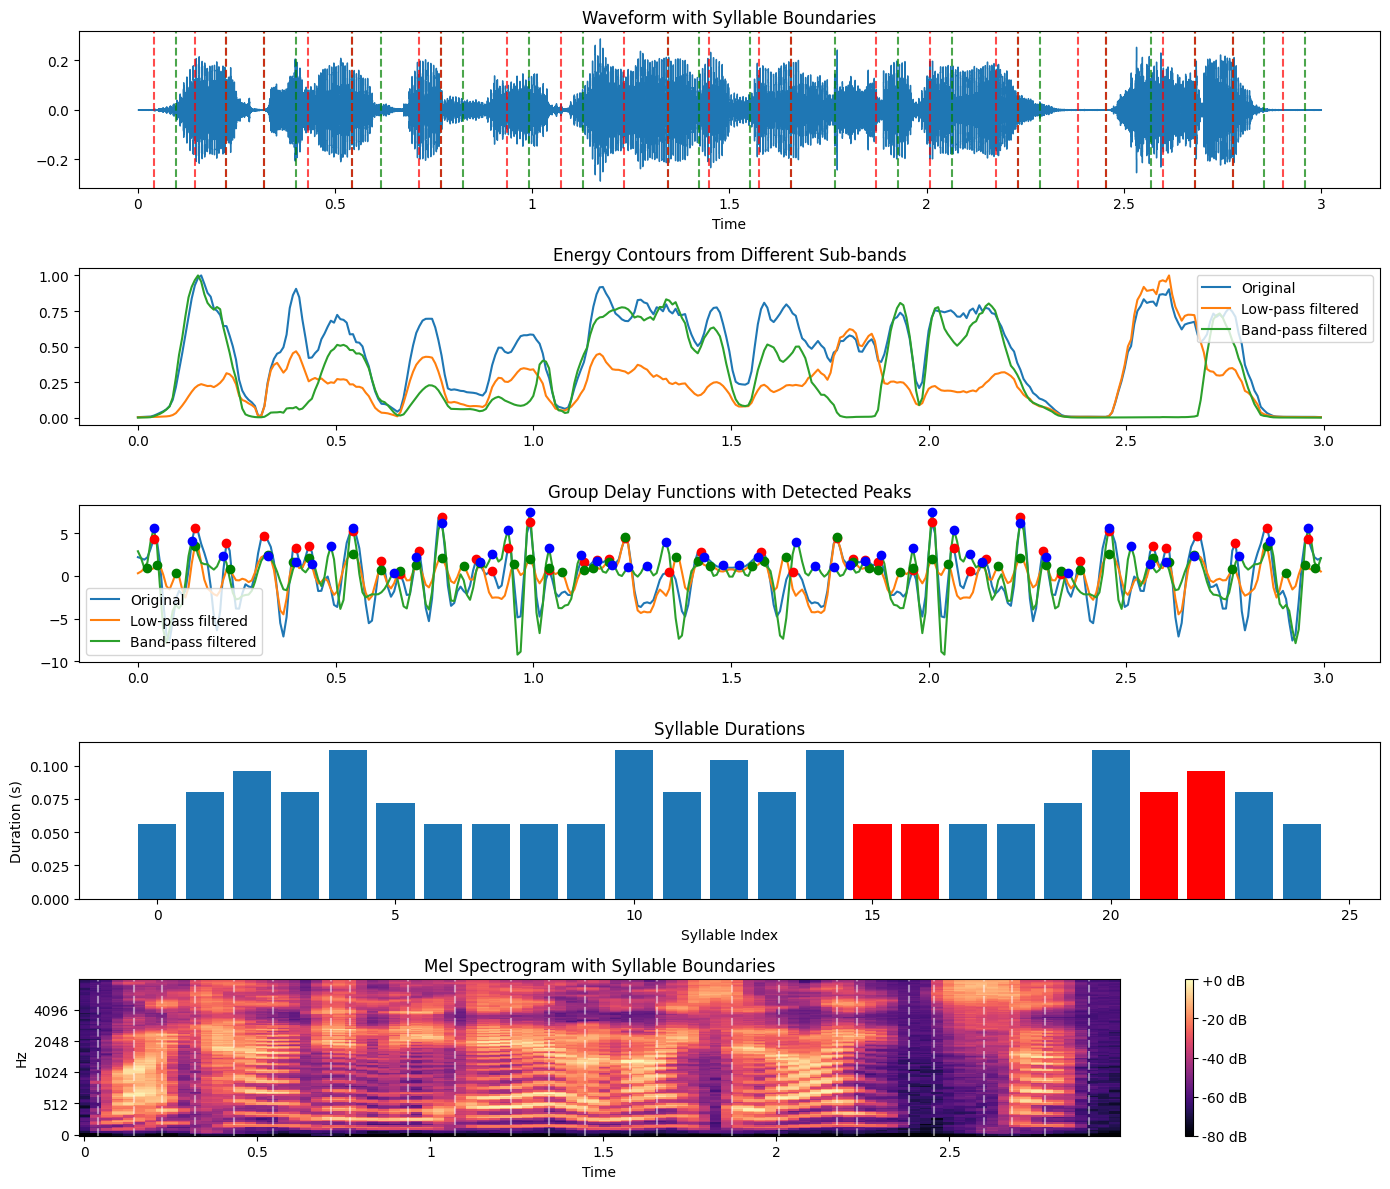


Syllable-Level Features for Stutter Detection:
Total Syllables: 25
Syllable Rate: 8.45 syllables/sec
Mean Syllable Duration: 77.1 ms
Duration Variability (CV): 0.27
Rhythm PVI (normalized): 0.25
Energy Variability: 0.53

Potential Syllable Repetitions: 2
  Syllables 16 and 17 appear repeated
  Syllables 22 and 23 appear repeated


In [ ]:
def test_syllable_level_extraction_gdf(clips_df, clip_index=0):
    """
    Test syllable-level feature extraction using group delay function approach

    Parameters:
        clips_df (DataFrame): DataFrame containing clip information
        clip_index (int): Index of clip to test

    Returns:
        dict: Extracted syllable features
    """
    if len(clips_df) <= clip_index:
        print(f"Error: clip index {clip_index} out of range. Dataset has {len(clips_df)} clips.")
        return

    # Define stutter types
    STUTTER_TYPES = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']

    sample_clip = clips_df.iloc[clip_index]
    file_path = sample_clip['file_path']

    print(f"Testing group delay function syllable extraction on clip {sample_clip['clip_id']}:")
    print(f"File path: {file_path}")
    print(f"Has stutter: {sample_clip['has_stutter']}")

    if sample_clip['has_stutter']:
        stutter_types = [st for st in STUTTER_TYPES if st in sample_clip and sample_clip[st]]
        print(f"Stutter types: {', '.join(stutter_types)}")

    # Extract and visualize syllable-level features using GDF approach
    syllable_features = extract_syllable_level_features(file_path, visualize=True)

    return syllable_features

# Example usage:
syllable_test_result = test_syllable_level_extraction_gdf(clips_df, clip_index=5)
